In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [2]:
df = pd.read_csv("./experiment/result/main_4/hyoutei.csv", header = 0)
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q197_3,Q198_1,Q198_2,Q198_3,Q199_1,Q199_2,Q199_3,Q200_1,Q200_2,Q200_3
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...,Intelligibility(明瞭�)\n\n発話者�発話の明瞭さ�度合いです�情報の聞き...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID209_3""}","{""ImportId"":""QID207_1""}","{""ImportId"":""QID207_2""}","{""ImportId"":""QID207_3""}","{""ImportId"":""QID208_1""}","{""ImportId"":""QID208_2""}","{""ImportId"":""QID208_3""}","{""ImportId"":""QID206_1""}","{""ImportId"":""QID206_2""}","{""ImportId"":""QID206_3""}"
2,2022/12/14 13:45,2022/12/14 14:10,0,110.5.23.62,100,1472,1,2022/12/14 14:10,R_2z8aLcGAXPYaMZb,NaN,...,1,3,4,3,3,4,4,5,5,3
3,2022/12/14 13:46,2022/12/14 14:12,0,175.177.223.74,100,1607,1,2022/12/14 14:12,R_1EcCkgk6syYH4P0,NaN,...,4,2,6,3,4,5,6,5,5,6
4,2022/12/14 13:45,2022/12/14 14:16,0,119.243.19.233,100,1886,1,2022/12/14 14:16,R_W8NV7sM9n8Dc0Kd,NaN,...,3,4,5,3,4,4,5,5,5,5
5,2022/12/14 13:44,2022/12/14 14:16,0,223.218.135.68,100,1973,1,2022/12/14 14:17,R_25FUSnmcS6Bo2Zy,NaN,...,4,2,5,2,3,2,3,5,6,5
6,2022/12/14 13:46,2022/12/14 14:20,0,60.124.23.27,100,2033,1,2022/12/14 14:20,R_2YVsj0ZY5ybzipf,NaN,...,4,3,5,4,6,4,5,5,6,5
7,2022/12/14 13:42,2022/12/14 14:22,0,114.166.37.220,100,2365,1,2022/12/14 14:22,R_31vpubcdOOFBZaP,NaN,...,3,3,5,3,3,3,5,6,5,3
8,2022/12/14 13:45,2022/12/14 14:27,0,153.205.218.142,100,2555,1,2022/12/14 14:27,R_1d453owPNuo0jI5,NaN,...,2,7,5,2,3,3,5,3,6,3
9,2022/12/14 13:44,2022/12/14 14:28,0,14.8.40.193,100,2679,1,2022/12/14 14:28,R_2ZJOpZhHbQkQ4Ue,NaN,...,2,1,4,4,5,3,4,7,6,4


In [40]:
df = pd.read_csv("./experiment/result/main_4/hyoutei.csv", header = 0)
df = df.drop(df.index[[0, 1]]) #余計な行を削除
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], axis=1) #IPアドレスとか
df = df.drop(['gender', 'age'], axis=1) #性別年齢
df = df.set_index('name')


df = df.astype('int')

In [41]:
#1回提示した音声のみを抽出
onetime = df.iloc[:, range(60)]
#2回提示した音声を抽出
twotime = df.iloc[:, range(540,600)]
#2回提示した音声を削除
df = df.iloc[:, range(540)]

In [42]:
difference = []
i=0
for i in range(len(onetime.columns)):
    difference.append(np.abs(onetime[onetime.columns[i]]-twotime[twotime.columns[i]]))
DifferenceDF = DataFrame(difference) 
DifferenceDF = DifferenceDF.T
#合計と平均を追加
DifferenceDF['Total'] = DifferenceDF[0:59].sum(axis=1)
DifferenceDF['Mean'] = DifferenceDF['Total']/60

In [43]:
df1 =  pd.concat([onetime,twotime],axis=1,join='inner')

# 音響分析

In [44]:
i = 0
meiryousa = []
for column in range(int(len(df.columns)/3)):
    meiryousa.append(df.loc[:,df.columns[i]])
    i+=3
meiryousa = DataFrame(meiryousa)


In [45]:
i = 1
shitashisa = []
for column in range(int(len(df.columns)/3)):
    shitashisa.append(df.loc[:,df.columns[i]])
    i+=3
shitashisa = DataFrame(shitashisa)


In [46]:
i = 2
syakaikaisou = []
for column in range(int(len(df.columns)/3)):
    syakaikaisou.append(df.loc[:,df.columns[i]])
    i+=3
syakaikaisou = DataFrame(syakaikaisou)

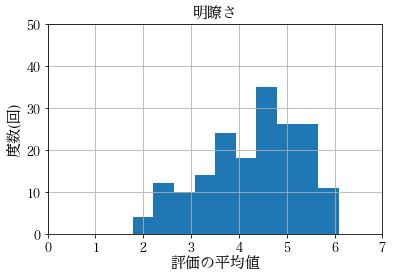

In [300]:
meiryousa.mean(axis='columns')


# sns.distplotでヒストグラムを描
plt.hist(meiryousa.mean(axis='columns'))
plt.rcParams['font.family'] = "Hiragino Mincho ProN"

plt.xlim(0, 7)                 # (1) x軸の表示範囲   
plt.ylim(0, 50)
            # (3) タイトル
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.xlabel("評価の平均値", fontsize=15)            # (4) x軸ラベル
plt.ylabel("度数(回)", fontsize=15)      # (5) y軸ラベル
plt.grid(True)                            # (6) 目盛線の表示
plt.tick_params(labelsize=12)

plt.title("明瞭さ", fontsize=15)
plt.savefig("./experiment/png/HistMeiryousa.png")
plt.show()


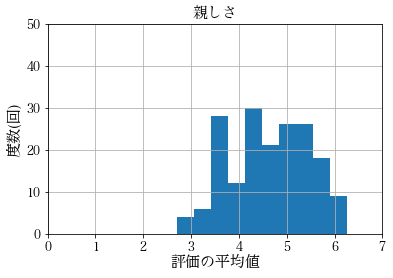

In [303]:
meiryousa.mean(axis='columns')


# sns.distplotでヒストグラムを描
plt.hist(shitashisa.mean(axis='columns'))
plt.rcParams['font.family'] = "Hiragino Mincho ProN"

plt.xlim(0, 7)                 # (1) x軸の表示範囲            
plt.ylim(0, 50)
   # (3) タイトル
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.xlabel("評価の平均値", fontsize=15)            # (4) x軸ラベル
plt.ylabel("度数(回)", fontsize=15)      # (5) y軸ラベル
plt.grid(True)                            # (6) 目盛線の表示
plt.tick_params(labelsize=12)

plt.title("親しさ", fontsize=15)
plt.savefig("./experiment/png/HistShitashisa.png")
plt.show()


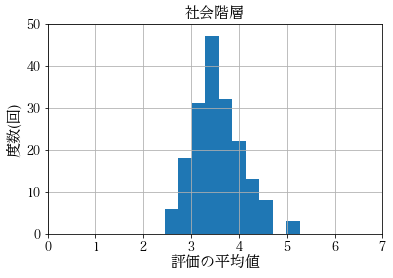

In [304]:
meiryousa.mean(axis='columns')


# sns.distplotでヒストグラムを描
plt.hist(syakaikaisou.mean(axis='columns'))
plt.rcParams['font.family'] = "Hiragino Mincho ProN"

plt.xlim(0, 7)                 # (1) x軸の表示範囲     
plt.ylim(0, 50)
          # (3) タイトル
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.xlabel("評価の平均値", fontsize=15)            # (4) x軸ラベル
plt.ylabel("度数(回)", fontsize=15)      # (5) y軸ラベル
plt.grid(True)                            # (6) 目盛線の表示
plt.tick_params(labelsize=12)

plt.title("社会階層", fontsize=15)
plt.savefig("./experiment/png/HistSyakaikaisou.png")
plt.show()


In [12]:
meryousa meiryousa.T.mean

name,mitubati555,kumiko0402,matosa3,toge7188,fumygo,rag_55,minshle,yoimachigusa,a0508,Weetabix,...,masoran,3cjobs,pukuripo,rena925maki823,tenkamt,aruru002,wolfz,雨谷,09-work,yousei22
Q1_1,4,6,5,6,5,5,6,7,5,3,...,7,5,6,4,7,4,5,6,5,4
Q2_1,4,4,5,4,5,4,4,7,5,5,...,5,5,6,6,6,5,4,6,4,4
Q3_1,4,3,5,4,5,4,3,6,5,5,...,2,6,5,5,5,5,5,3,4,3
Q4_1,4,5,4,5,5,4,3,7,4,6,...,7,5,6,6,7,6,6,5,6,4
Q5_1,5,4,5,4,6,6,2,7,5,7,...,7,4,5,5,7,3,6,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q176_1,5,6,5,5,5,4,3,7,5,6,...,7,6,5,6,7,5,6,6,6,4
Q177_1,4,6,3,4,6,5,3,6,5,6,...,6,5,5,5,6,6,7,6,6,4
Q178_1,3,2,5,4,5,6,2,6,4,6,...,4,4,5,5,5,6,4,4,2,4
Q179_1,3,2,3,2,3,3,1,2,4,2,...,1,3,2,2,3,2,4,2,1,3


In [48]:
meiryousaMean = meiryousa.assign(mean=meiryousa.T.mean())


In [49]:
shitashisaMean = shitashisa.assign(mean=shitashisa.T.mean())

In [50]:
syakaikaisouMean = syakaikaisou.assign(mean=shitashisa.T.mean())

In [26]:
meiryousa.shape[1]

57

In [20]:
meiryousa

name,mitubati555,kumiko0402,matosa3,toge7188,fumygo,rag_55,minshle,yoimachigusa,a0508,Weetabix,...,pukuripo,rena925maki823,tenkamt,aruru002,wolfz,雨谷,09-work,yousei22,X,mean
Q1_1,4,6,5,6,5,5,6,7,5,3,...,6,4,7,4,5,6,5,4,0,5.089286
Q2_1,4,4,5,4,5,4,4,7,5,5,...,6,6,6,5,4,6,4,4,0,4.678571
Q3_1,4,3,5,4,5,4,3,6,5,5,...,5,5,5,5,5,3,4,3,0,4.517857
Q4_1,4,5,4,5,5,4,3,7,4,6,...,6,6,7,6,6,5,6,4,0,5.285714
Q5_1,5,4,5,4,6,6,2,7,5,7,...,5,5,7,3,6,6,3,4,0,4.946429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q176_1,5,6,5,5,5,4,3,7,5,6,...,5,6,7,5,6,6,6,4,0,5.428571
Q177_1,4,6,3,4,6,5,3,6,5,6,...,5,5,6,6,7,6,6,4,0,5.125000
Q178_1,3,2,5,4,5,6,2,6,4,6,...,5,5,5,6,4,4,2,4,0,4.339286
Q179_1,3,2,3,2,3,3,1,2,4,2,...,2,2,3,2,4,2,1,3,0,2.428571


In [332]:
# meiryousa.to_csv("./csv/SpeakingStyle/meiryousa.csv")
# shitashisa.to_csv("./csv/SpeakingStyle/shitashisa.csv")
# syakaikaisou.to_csv("./csv/SpeakingStyle/syakaikaisou.csv")

# 異なる音声の評価のばらつきを見る

In [13]:
i = 0
meiryousa = []
for column in range(int(len(df.columns)/3)):
    meiryousa.append(df.loc[:,df.columns[i]])
    i+=3
meiryousa = DataFrame(meiryousa)

i = 1
shitashisa = []
for column in range(int(len(df.columns)/3)):
    shitashisa.append(df.loc[:,df.columns[i]])
    i+=3
shitashisa = DataFrame(shitashisa)

i = 2
syakaikaisou = []
for column in range(int(len(df.columns)/3)):
    syakaikaisou.append(df.loc[:,df.columns[i]])
    i+=3
syakaikaisou = DataFrame(syakaikaisou)

In [860]:
#異なる音声で比べる場合は転置する。
#被験者間を比べるときはここをコメントアウトして上のセルのままにする
# meiryousa = meiryousa.T
# shitashisa = shitashisa.T
# syakaikaisou = syakaikaisou.T

In [274]:
varI=[]
stdI=[]
for i in range(len(meiryousa.index)):
    varI.append(meiryousa.loc[meiryousa.index[i],:].var())
    stdI.append(meiryousa.loc[meiryousa.index[i],:].std())
dfvarI =DataFrame(varI,index=meiryousa.index,columns=["分散"])
dfstdI =DataFrame(stdI,index=meiryousa.index,columns=["標準偏差"])
dfbaratukiI = pd.concat([dfstdI,dfvarI],axis=1,join='inner')

In [275]:
varF=[]
stdF=[]
for i in range(len(shitashisa.index)):
    varF.append(shitashisa.loc[shitashisa.index[i],:].var())
    stdF.append(shitashisa.loc[shitashisa.index[i],:].std())
dfvarF =DataFrame(varF,index=shitashisa.index,columns=["分散"])
dfstdF =DataFrame(stdF,index=shitashisa.index,columns=["標準偏差"])
dfbaratukiF = pd.concat([dfstdF,dfvarF],axis=1,join='inner')

In [276]:
varC=[]
stdC=[]
for i in range(len(syakaikaisou.index)):
    varC.append(syakaikaisou.loc[syakaikaisou.index[i],:].var())
    stdC.append(syakaikaisou.loc[syakaikaisou.index[i],:].std())
dfvarC =DataFrame(varC,index=syakaikaisou.index,columns=["分散"])
dfstdC =DataFrame(stdC,index=syakaikaisou.index,columns=["標準偏差"])
dfbaratukiC = pd.concat([dfstdC,dfvarC],axis=1,join='inner')

In [277]:
#sns.catplotで箱ひげ図を描く
# sns.catplot(data=dfbaratukiI, kind='box')
# plt.rcParams['font.family'] = "Hiragino Mincho ProN"
#                 # (1) x軸の表示範囲
# plt.ylim(0, 4)    
# plt.title("明瞭さのばらつき", fontsize=15)

# plt.show()

In [866]:
#sns.catplotで箱ひげ図を描く
# sns.catplot(data=dfbaratukiF, kind='box')
# plt.rcParams['font.family'] = "Hiragino Mincho ProN"
#                 # (1) x軸の表示範囲
# plt.ylim(0, 4)    
# plt.title("親しさのばらつき", fontsize=15)

# plt.show()

In [867]:
#sns.catplotで箱ひげ図を描く
# sns.catplot(data=dfbaratukiC, kind='box')
# plt.rcParams['font.family'] = "Hiragino Mincho ProN"
#                 # (1) x軸の表示範囲
# plt.ylim(0, 4)    
# plt.title("社会階層のばらつき", fontsize=15)

# plt.show()



In [21]:
#それぞれの尺度で並べるため
varI=[]
for i in range(len(meiryousa.index)):
    varI.append(meiryousa.loc[meiryousa.index[i],:].var())
    stdI.append(meiryousa.loc[meiryousa.index[i],:].std())
dfvarI =DataFrame(varI,columns=["明瞭さ"])
dfstdI =DataFrame(stdI,columns=["明瞭さ"])

varF=[]
for i in range(len(shitashisa.index)):
    varF.append(shitashisa.loc[shitashisa.index[i],:].var())
    stdF.append(shitashisa.loc[shitashisa.index[i],:].std())
dfvarF =DataFrame(varF,columns=["親しさ"])
dfstdF =DataFrame(stdF,columns=["親しさ"])

varC=[]
for i in range(len(syakaikaisou.index)):
    varC.append(syakaikaisou.loc[syakaikaisou.index[i],:].var())
    stdF.append(syakaikaisou.loc[syakaikaisou.index[i],:].std())
dfvarC =DataFrame(varC,columns=["社会階層"])
dfstdC =DataFrame(stdC,columns=["社会階層"])


dfvar = pd.concat([dfvarI,dfvarF,dfvarC],axis=1,join='inner')
dfstd = pd.concat([dfstdI,dfstdF,dfstdC],axis=1,join='inner')

In [869]:
#sns.catplotで箱ひげ図を描く
# sns.catplot(data=dfvar, kind='box')
# plt.rcParams['font.family'] = "Hiragino Mincho ProN"
#                 # (1) x軸の表示範囲
# plt.ylim(0, 4)    
# plt.title("Speaking style尺度の分散", fontsize=15)
# plt.savefig("./experiment/png/bunsan.png")
# plt.show()

In [870]:
# dfS = DataFrame(df.std())
# dfS = dfS.rename(columns={0:"Speaking style"})
# dfS

In [22]:
#異なる音声のばらつきを見るときはこっち
dfS = DataFrame(df.std())
dfS = dfS.rename(columns={0:"Speaking style"})
dfS

,Speaking style
Q1_1,0.997726
Q1_2,0.968404
Q1_3,1.382733
Q2_1,0.984151
Q2_2,0.875156
...,...
Q179_2,1.300970
Q179_3,1.157270
Q180_1,1.214287
Q180_2,1.292888


In [873]:
np.percentile(dfS, [75 ,50,25])

array([1.20158212, 1.08949283, 0.97537728])

In [874]:
q75, q25 = np.percentile(dfS, [75 ,25])
iqr = q75 - q25
iqr

0.22620483570163685

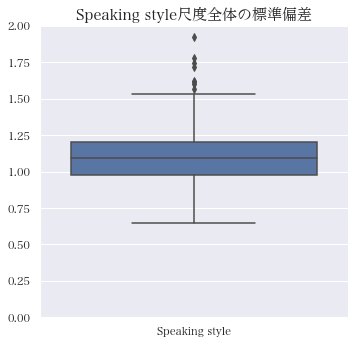

In [893]:
#sns.catplotで箱ひげ図を描く
# sns.catplot(data=dfS, kind='box')
# plt.rcParams['font.family'] = "Hiragino Mincho ProN"
#                 # (1) x軸の表示範囲
# plt.subplots_adjust(top = 0.9 )#余白の調整　
# plt.ylim(0, 2)    
# plt.title("Speaking style尺度全体の標準偏差", fontsize=15)
# plt.rcParams['figure.subplot.bottom'] = 0.15#xラベルが見切れないようにする
# plt.savefig("./experiment/png/hyoujunhensaAll.png")
# plt.show()

In [894]:
dfstd

,明瞭さ,親しさ,社会階層
0,1.05,1.16,1.36
1,0.98,0.93,0.83
2,1.02,0.64,0.84
3,1.05,1.23,1.14
4,1.27,1.04,0.98
...,...,...,...
175,1.16,1.10,0.88
176,1.05,1.09,1.00
177,1.19,1.34,1.16
178,0.80,1.32,1.10


In [895]:
np.percentile(dfstd["明瞭さ"], [75 ,50,25])

array([1.2060799 , 1.09572115, 0.98373875])

In [896]:
q75, q25 = np.percentile(dfstd["明瞭さ"], [75 ,25])
iqr = q75 - q25
iqr

0.222341151144259

In [897]:
np.percentile(dfstd["親しさ"], [75 ,50,25])

array([1.28891052, 1.13924188, 1.03514575])

In [898]:
q75, q25 = np.percentile(dfstd["親しさ"], [75 ,25])
iqr = q75 - q25
iqr

0.2537647726444041

In [899]:
np.percentile(dfstd["社会階層"], [75 ,50,25])

array([1.12477596, 1.0155048 , 0.9402495 ])

In [900]:
q75, q25 = np.percentile(dfstd["社会階層"], [75 ,25])
iqr = q75 - q25
iqr

0.18452646220901991

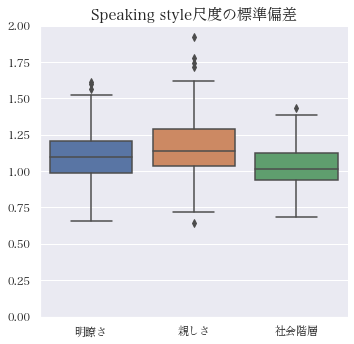

In [901]:
#sns.catplotで箱ひげ図を描く
sns.catplot(data=dfstd, kind='box')
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
                # (1) x軸の表示範囲
plt.subplots_adjust(top = 0.9)#余白の調整　


plt.ylim(0, 2.0)    
plt.title("Speaking style尺度の標準偏差", fontsize=15)
plt.rcParams['figure.subplot.bottom'] = 0.15#xラベルが見切れないようにする
plt.savefig("./experiment/png/hyoujunhensa.png")
plt.show()

In [902]:
#分散が大きいとデータの散らばりが大きい

#sns.catplotで箱ひげ図を描く
# sns.catplot(data=dfvar, kind='swarm')
# plt.rcParams['font.family'] = "Hiragino Mincho ProN"
#                 # (1) x軸の表示範囲
# plt.ylim(0, 4)    
# plt.title("Speaking style尺度の分散", fontsize=15)
# plt.savefig("./experiment/png/bunsan.png")
# plt.show()

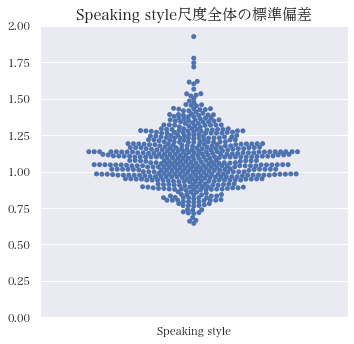

In [903]:
#分散が大きいとデータの散らばりが大きい

#sns.catplotで箱ひげ図を描く
sns.catplot(data=dfS, kind='swarm')
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
                # (1) x軸の表示範囲
plt.subplots_adjust(top = 0.9 )#余白の調整　
plt.ylim(0, 2.0)    
plt.rcParams['figure.subplot.bottom'] = 0.15#xラベルが見切れないようにする
plt.title("Speaking style尺度全体の標準偏差", fontsize=15)

plt.savefig("./experiment/png/hyoujunhensaAll2.png")
plt.show()

/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


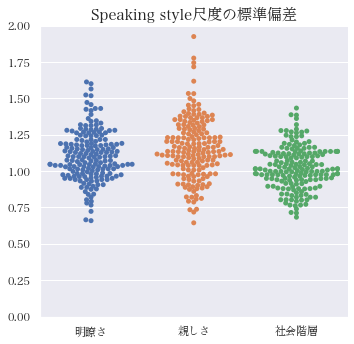

In [904]:
#sns.catplotで箱ひげ図を描く
sns.catplot(data=dfstd, kind='swarm')
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
                # (1) x軸の表示範囲
plt.subplots_adjust(top = 0.9)#余白の調整　


plt.ylim(0, 2.0)    
plt.title("Speaking style尺度の標準偏差", fontsize=15)
plt.rcParams['figure.subplot.bottom'] = 0.15#xラベルが見切れないようにする
plt.savefig("./experiment/png/hyoujunhensa.png")
plt.show()

In [905]:
#重み付きカッパ係数の値で除外した標準偏差
# df1 =  df.drop(df.index[[7,8,19,30,31 ]])
# i = 0
# meiryousa = []
# for column in range(int(len(df1.columns)/3)):
#     meiryousa.append(df1.loc[:,df1.columns[i]])
#     i+=3
# meiryousa = DataFrame(meiryousa)

# i = 1
# shitashisa = []
# for column in range(int(len(df1.columns)/3)):
#     shitashisa.append(df1.loc[:,df1.columns[i]])
#     i+=3
# shitashisa = DataFrame(shitashisa)

# i = 2
# syakaikaisou = []
# for column in range(int(len(df1.columns)/3)):
#     syakaikaisou.append(df1.loc[:,df1.columns[i]])
#     i+=3
# syakaikaisou = DataFrame(syakaikaisou)

In [906]:
#それぞれの尺度で並べるため
# varI=[]
# for i in range(len(meiryousa.index)):
#     varI.append(meiryousa.loc[meiryousa.index[i],:].var())
#     stdI.append(meiryousa.loc[meiryousa.index[i],:].std())
# dfvarI =DataFrame(varI,columns=["明瞭さ"])
# dfstdI =DataFrame(stdI,columns=["明瞭さ"])

# varF=[]
# for i in range(len(shitashisa.index)):
#     varF.append(shitashisa.loc[shitashisa.index[i],:].var())
#     stdF.append(shitashisa.loc[shitashisa.index[i],:].std())
# dfvarF =DataFrame(varF,columns=["親しさ"])
# dfstdF =DataFrame(stdF,columns=["親しさ"])

# varC=[]
# for i in range(len(syakaikaisou.index)):
#     varC.append(syakaikaisou.loc[syakaikaisou.index[i],:].var())
#     stdF.append(syakaikaisou.loc[syakaikaisou.index[i],:].std())
# dfvarC =DataFrame(varC,columns=["社会階層"])
# dfstdC =DataFrame(stdC,columns=["社会階層"])


# dfvar = pd.concat([dfvarI,dfvarF,dfvarC],axis=1,join='inner')
# dfstd = pd.concat([dfstdI,dfstdF,dfstdC],axis=1,join='inner')

In [907]:
#sns.catplotで箱ひげ図を描く
# sns.catplot(data=dfstd, kind='box')
# plt.rcParams['font.family'] = "Hiragino Mincho ProN"
#                 # (1) x軸の表示範囲
# plt.ylim(0, 2)    
# plt.title("重み付きカッパ係数で除外したSpeaking style尺度の標準偏差", fontsize=15)
# plt.savefig("./experiment/png/hyoujunhensa3.png")
# plt.show()

In [908]:
#sns.catplotで箱ひげ図を描く
# sns.catplot(data=dfstd, kind='swarm')
# plt.rcParams['font.family'] = "Hiragino Mincho ProN"
#                 # (1) x軸の表示範囲
# plt.ylim(0, 2)    
# plt.title("重み付きカッパ係数で除外したSpeaking style尺度の標準偏差", fontsize=15)
# plt.savefig("./experiment/png/hyoujunhensa4.png")
# plt.show()

/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


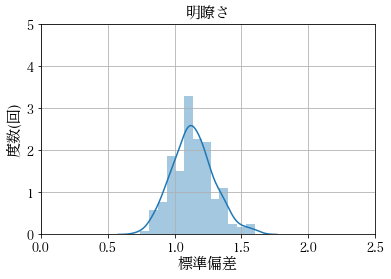

In [281]:

#sns.distplotでヒストグラムを描く
sns.distplot(dfstd["明瞭さ"] ,kde=True)
plt.rcParams['font.family'] = "Hiragino Mincho ProN"

plt.xlim(0, 2.5)                 # (1) x軸の表示範囲
plt.ylim(0, 5)                 # (3) タイトル
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.xlabel("標準偏差", fontsize=15)            # (4) x軸ラベル
plt.ylabel("度数(回)", fontsize=15)      # (5) y軸ラベル
plt.grid(True)                            # (6) 目盛線の表示
plt.tick_params(labelsize = 12) 

plt.title("明瞭さ", fontsize=15)
#plt.savefig("./experiment/png/hyoujunhensaHist1.png")
plt.show()

/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


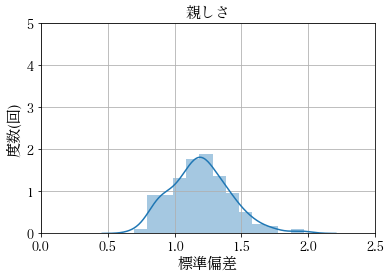

In [282]:

#sns.distplotでヒストグラムを描く
sns.distplot(dfstd["親しさ"], kde=True,)
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.xlim(0, 2.5)                 # (1) x軸の表示範囲
plt.ylim(0, 5)                 # (3) タイトル
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.xlabel("標準偏差", fontsize=15)            # (4) x軸ラベル
plt.ylabel("度数(回)", fontsize=15)      # (5) y軸ラベル
plt.grid(True)                            # (6) 目盛線の表示
plt.tick_params(labelsize = 12) 

plt.title("親しさ", fontsize=15)
#plt.savefig("./experiment/png/hyoujunhensaHist2.png")
plt.show()

/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


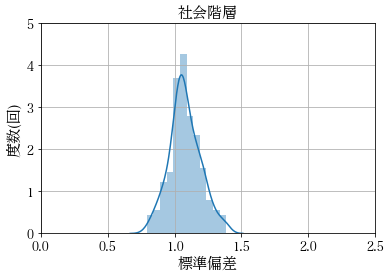

In [283]:

#sns.distplotでヒストグラムを描く
sns.distplot(dfstd["社会階層"],kde=True)
plt.rcParams['font.family'] = "Hiragino Mincho ProN"

plt.xlim(0, 2.5)                 # (1) x軸の表示範囲
plt.ylim(0, 5)          # (3) タイトル
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.xlabel("標準偏差", fontsize=15)            # (4) x軸ラベル
plt.ylabel("度数(回)", fontsize=15)      # (5) y軸ラベル
plt.grid(True)                            # (6) 目盛線の表示
plt.tick_params(labelsize = 12) 

plt.title("社会階層", fontsize=15)
#plt.savefig("./experiment/png/hyoujunhensaHist3.png")
plt.show()

In [912]:

#重ねて描画
# plt.rcParams['font.family'] = "Hiragino Mincho ProN"

# plt.xlim(0, 2.5)                 # (1) x軸の表示範囲
# plt.ylim(0, 3.5)                 # (3) タイトル
# plt.xlabel("標準偏差", fontsize=15)            # (4) x軸ラベル
# plt.ylabel("度数(回)", fontsize=15)      # (5) y軸ラベル
# plt.grid(True)                            # (6) 目盛線の表示
# plt.tick_params(labelsize = 12) 


# sns.distplot(dfstd["明瞭さ"] ,color='blue',kde=True,label='明瞭さ')
# #sns.distplotでヒストグラムを描く
# sns.distplot(dfstd["親しさ"],color='red',kde=True,label='親しさ')
# #sns.distplotでヒストグラムを描く
# sns.distplot(dfstd["社会階層"],color='green', kde=True,label='社会階層')


# plt.title("speaking style尺度", fontsize=15)

# plt.legend(fontsize=15)
# plt.savefig("./experiment/png/hyoujunhensaHist4.png")
# plt.show()

/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

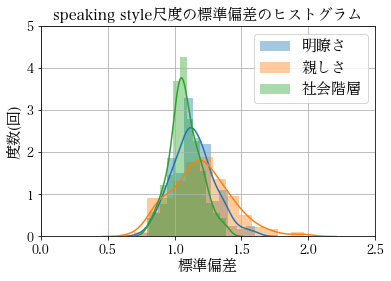

In [280]:

#重ねて描画
plt.rcParams['font.family'] = "Hiragino Mincho ProN"

plt.xlim(0, 2.5)                # (1) x軸の表示範囲
plt.ylim(0, 5)                 # (3) タイトル
     # (5) y軸ラベル
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.grid(True) 
plt.tick_params(labelsize = 12) 
plt.ylabel("度数(回)", fontsize=15) 

sns.distplot(dfstd["明瞭さ"] ,kde=True,label='明瞭さ')
#sns.distplotでヒストグラムを描く
sns.distplot(dfstd["親しさ"],kde=True,label='親しさ')
#sns.distplotでヒストグラムを描く
sns.distplot(dfstd["社会階層"], kde=True,label='社会階層')
plt.xlabel("標準偏差", fontsize=15) 
           # (4) x軸ラベル


plt.title("speaking style尺度の標準偏差のヒストグラム", fontsize=15)

plt.legend(fontsize=15)
plt.grid(True) 
plt.savefig("./experiment/png/hyoujunhensaHist4.png")
plt.show()

# 重回帰分析　モデル構築

In [52]:
import numpy as np
#赤池情報量基準
def AIC(x, y):#xは説明変数、yは目的変数
    model = sm.OLS(y, sm.add_constant(x))
    result = model.fit()
    return result.aic
    
    
#     beta = np.linalg.solve(x.T @ x, x.T @ y)# 回帰係数を求めます。
#     y_pred = x @ beta# 予測値を求めます。
#     resid = y - y_pred# 残渣（実データ－予測値）を求めます。
#     rss = resid.T @ resid# 残渣の二乗和を求めます。
#     AIC = len(y) *np.log(rss/len(y)) + (x.shape[1])*2# AICを求めます。
#     return AIC



# ベイズ情報量基準
def BIC(x, y):
    beta = np.linalg.solve(x.T @ x, x.T @ y)# 回帰係数を求めます。
    y_pred = x @ beta# 予測値を求めます。
    resid = y - y_pred# 残渣（実データ－予測値）を求めます。
    rss = resid.T @ resid# 残渣の二乗和を求めます。
    BIC = len(y) *np.log(rss/len(y)) + (x.shape[1])*np.log(len(y))# BICを求めます。
    return BIC
# 変数選択後のサンプルデータから回帰係数を求めます。
def forward_stepwise_result(x, y):
    beta = np.linalg.solve(x.T @ x, x.T @ y)
    return beta
def forward_stepwise(x, y, method='BIC'):
    """
    forward stepwise（変数増加法）で変数選択を行います。
        
    パラメータ
    ----------
        x :説明変数のデータセット 
        y :目的変数のデータセット
        method: 'AIC' or 'BIC'. Defaults to 'BIC'.
    戻り値
    ----------
        beta:回帰係数（最小二乗法）
        included_column:選択されたカラム名
        result_min: AICかBICの最終結果（最小値）
    """
    # xに要素１のintercept列を追加（0列目）
    x_tmp = np.concatenate(
        [np.reshape(np.ones(x.shape[0]), (x.shape[0],1)), x], axis=1
    ) # 要素１のarrayをn行１列にreshapeし、xと結合
    included = list([0]) #intercept列のみ（初期値）
    while True:
        changed = False
        excluded = list(set(np.arange(x_tmp.shape[1]))-set(included) ) #　除外した（未採用）列の番号list
        result = np.zeros(len(excluded)) #AIC,BICの計算結果を格納する変数
        if method == 'AIC':
            base_result = AIC(x_tmp[:, included], y) # 採用列のデータのみでAICを計算
        else:
            base_result = BIC(x_tmp[:, included], y) # 採用列のデータのみでBICを計算
        print('Baseline model with {}:{:}'.format(method, base_result))
        j = 0
        for new_column in excluded:
            if method == 'AIC':
                result[j] = AIC(x_tmp[:, included + [new_column]], y) # 採用列以外の列を追加してAICを順番に計算する
            else:     
                result[j] = BIC(x_tmp[:, included + [new_column]], y) # 採用列以外の列を追加してBICを順番に計算する
            # print('Add:{:15} with {}: {:}'.format(excluded[j], method,result[j])) # コメントアウト
            j += 1
        if result.min() < base_result:
            best_feature = excluded[result.argmin()] # argmin():最小値を取るインデックスを返す
            included.append(best_feature) # 最小値を取る列数をincluded（採用列）に追加
            changed = True
            print('Finally Add {:15} with {} {:}'.format(best_feature, method, result.min()))
        if not changed: #changed=Falseのとき
            print('Any variables does not added, stop forward stepwise regression')
            break
            # end while
                
    # final resultの回帰係数を返す
    beta = np.reshape(np.zeros(x_tmp.shape[1]), (x_tmp.shape[1],1)) # 回帰係数を格納する変数
    beta = forward_stepwise_result(x_tmp[:, included], y) # 回帰係数を計算
    included.pop(0) # intercept列は除去
    included_r = [ i - 1 for i in included] # xのcolumn numberに変更（included - 1）
    included_column = x.columns[[included_r]] # 採用した列名を取得
    result_min = base_result # 最小値を取得
    
    return beta, included_column, result_min

In [53]:
ranking = DifferenceDF.sort_values("Mean")
ranking = ranking.iloc[:, 60:]
ranking = ranking.drop(ranking.index[[6, 17]])

In [54]:
#精度の良い被験者のみにする
seido1 = ranking[ranking["Mean"]<=1.00]#15人
seido1 = seido1.reset_index()
seido2 = ranking[ranking["Mean"]<=1.10]#19人
seido2 = seido2.reset_index()

In [55]:
#除外なし
df0 = df
#カッパ係数の値を元に除外する
df1 =  df.drop(df.index[[7,8,19,30,31 ]])
#1回目と2回目の評価値の差で除外する(平均3.0以下)
df2 =  df.drop(df.index[[7,8,19,30,31,  26,11,15  ]])
#1回目と2回目の評価値の差で除外する(平均2.7以下)
df3 =  df.drop(df.index[[7,8,19,30,31,  26,11,15  , 17,2,25,4,28,9]])
#1回目と2回目の評価値の差で除外する(平均2.5以下)
df4 =  df.drop(df.index[[7,8,19,30,31,  26,11,15  , 17,2,25,4,28,9    , 29,18,20,1,14]])
#1回目と2回目の評価値の差で除外する(平均2.0以下)
df5 =  df.drop(df.index[[7,8,19,30,31,  26,11,15  , 17,2,25,4,28,9    , 29,18,20,1,14    ,12,16,22,27,24 ]])


#15人
df6 = df.loc[seido1["name"]]
df6 = df6.astype('int')
#19人
df7 = df.loc[seido2["name"]]
df7 = df7.astype('int')


In [56]:
tokutyou = pd.read_csv("./csv/SpeakingStyle/Opensmilewav.csv")
#tokutyou = tokutyou.set_index("file")
#tokutyou.astype('float16')

#明らかにおかしい音声を除外

#外れ値だが除外するべきか
#tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"HNRdBACF_sma3nz_stddevNorm"]<0.001].index)

#tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"slopeV0-500_sma3nz_stddevNorm"]>5].index)

#tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"slopeV500-1500_sma3nz_stddevNorm"]<-100].index)

# tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"mfcc3_sma3_stddevNorm"]<-100].index)

# tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"logRelF0-H1-H2_sma3nz_stddevNorm"]<-100].index)


# tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"mfcc2_sma3_stddevNorm"]>50].index)
# tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"mfcc4_sma3_stddevNorm"]<-50].index)
# tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"logRelF0-H1-H2_sma3nz_stddevNorm"]>50].index)

# tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"slopeV500-1500_sma3nz_stddevNorm"]<-50].index)
# tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"mfcc2V_sma3nz_stddevNorm"]<-25].index)
# tokutyou = tokutyou.drop(tokutyou[tokutyou.loc[:,"mfcc2V_sma3nz_stddevNorm"]>25].index)


In [57]:
#dfの数字を1から　5に変更して比較
i = 0
meiryousa = []
for column in range(int(len(df6.columns)/3)):
    meiryousa.append(df6.loc[:,df6.columns[i]])
    i+=3
meiryousa = DataFrame(meiryousa)

In [58]:
i = 1
shitashisa = []
for column in range(int(len(df6.columns)/3)):
    shitashisa.append(df6.loc[:,df6.columns[i]])
    i+=3
shitashisa = DataFrame(shitashisa)

In [59]:
i = 2
syakaikaisou = []
for column in range(int(len(df6.columns)/3)):
    syakaikaisou.append(df6.loc[:,df6.columns[i]])
    i+=3
syakaikaisou = DataFrame(syakaikaisou)

In [60]:
onkyouMeiryousa = meiryousa.reset_index(drop=True)
onkyouMeiryousa = pd.concat([tokutyou,onkyouMeiryousa],axis=1,join='inner')
onkyouShitashisa = shitashisa.reset_index(drop=True)
onkyouShitashisa = pd.concat([tokutyou,onkyouShitashisa],axis=1,join='inner')
onkyouSyakaikaisou = syakaikaisou.reset_index(drop=True)
onkyouSyakaikaisou = pd.concat([tokutyou,onkyouSyakaikaisou],axis=1,join='inner')

onkyouMeiryousa = onkyouMeiryousa.set_index("file")
onkyouShitashisa = onkyouShitashisa.set_index("file")
onkyouSyakaikaisou = onkyouSyakaikaisou.set_index("file")

In [61]:
tokutyou = tokutyou.set_index("file")

In [62]:
# # # 外れ値の確認　（ヒストグラム）
# for i in range(len(tokutyou.columns)):
#     Q1 = tokutyou.loc[:,tokutyou.columns[i]]
#     sns.distplot(Q1)
#     plt.show()

In [63]:
# シャピロ・ウィルク検定(S-W検定) 被験者間 正規性の確認 p値が0.5以下であれば正規性がない
for i in range(len(meiryousa.columns)):
    Q1 = meiryousa.loc[:,meiryousa.columns[i]]
    print(stats.shapiro(Q1))

ShapiroResult(statistic=0.861014723777771, pvalue=8.536582898899248e-12)
ShapiroResult(statistic=0.8679094910621643, pvalue=1.8875815840924126e-11)
ShapiroResult(statistic=0.8740346431732178, pvalue=3.911048915283821e-11)
ShapiroResult(statistic=0.8762193322181702, pvalue=5.100497454946229e-11)
ShapiroResult(statistic=0.8470045328140259, pvalue=1.8409852635403734e-12)
ShapiroResult(statistic=0.9051883220672607, pvalue=2.4027273504145796e-09)
ShapiroResult(statistic=0.9048503637313843, pvalue=2.2877881811211864e-09)
ShapiroResult(statistic=0.8750702738761902, pvalue=4.433962225158794e-11)
ShapiroResult(statistic=0.935411810874939, pvalue=3.2575525210631895e-07)
ShapiroResult(statistic=0.8877484798431396, pvalue=2.1851581655241148e-10)
ShapiroResult(statistic=0.9316042065620422, pvalue=1.6419865289662994e-07)
ShapiroResult(statistic=0.9287245869636536, pvalue=9.923998334215867e-08)
ShapiroResult(statistic=0.9043125510215759, pvalue=2.1165793562261115e-09)
ShapiroResult(statistic=0.882970

In [64]:
#ここ間違えてた、判断が逆


#シャピロ・ウィルク検定(S-W検定) 一音声に対する 正規性の確認 p値が0.5以下であれば正規性がある
#0.5よりも大きいもののみをひょうじ

#0からスタートなので 上から17,32,61ばんめ
# sns.set()
# jogai=[]
# for i in range(len(meiryousa.index)):
#     Q1 = meiryousa.loc[meiryousa.index[i]]
#     if stats.shapiro(Q1).pvalue>0.05:
#         print(i)

In [65]:
#シャピロ・ウィルク検定(S-W検定) 一音声に対する 正規性の確認 p値が0.5以下であれば正規性がある
#0.5よりも大きいもののみをひょうじ

#0からスタートなので 上から17,32,61ばんめ
# sns.set()
# jogai=[]
# for i in range(len(meiryousa.index)):
#     Q1 = meiryousa.loc[meiryousa.index[i]]
#     if stats.shapiro(Q1).pvalue>0.05:
#         jogai.append(i)

In [66]:
#正規性が確認できない音声を除外
#重回帰分析の代表値として平均値を採用するため
jogaiMeiryousa= onkyouMeiryousa.drop(onkyouMeiryousa.index[jogai]) 

NameError: name 'jogai' is not defined

In [67]:
# jogai = []
# for i in range(len(shitashisa.index)):
#     Q1 = shitashisa.loc[shitashisa.index[i]]
#     if stats.shapiro(Q1).pvalue>0.05:
#         print(i)

In [68]:
# jogai = []
# for i in range(len(shitashisa.index)):
#     Q1 = shitashisa.loc[shitashisa.index[i]]
#     if stats.shapiro(Q1).pvalue>0.05:
#         jogai.append(i)

In [69]:
#被験者の除外していないもの
jogaiShitashisa= onkyouShitashisa.drop(onkyouShitashisa.index[jogai]) 

NameError: name 'jogai' is not defined

In [70]:
# jogai = []
# for i in range(len(syakaikaisou.index)):
#     Q1 = syakaikaisou.loc[syakaikaisou.index[i]]
#     if stats.shapiro(Q1).pvalue>0.05:
#         print(i)

In [71]:
# jogai = []
# for i in range(len(syakaikaisou.index)):
#     Q1 = syakaikaisou.loc[syakaikaisou.index[i]]
#     if stats.shapiro(Q1).pvalue>0.05:
#         jogai.append(i)

In [72]:
#被験者の除外をしていないもの
jogaiSyakaikaisou= onkyouSyakaikaisou.drop(onkyouSyakaikaisou.index[jogai]) #余計な行を削除

NameError: name 'jogai' is not defined

In [73]:
mean = DataFrame(np.mean(meiryousa,axis=1))
mean = mean.rename(columns={0:"mean"})
mean.reset_index(drop=True)


,mean
0,4.8750
1,4.5625
2,4.7500
3,5.1250
4,5.1250
...,...
175,5.2500
176,5.0625
177,4.5000
178,3.0000


In [82]:
mean = DataFrame(np.mean(meiryousa, axis=1))
mean = mean.rename(columns={0: "mean"})
mean.reset_index(drop=True)
onkyouMeiryousa.reset_index(drop=True)
onkyouMeiryousa = onkyouMeiryousa.reset_index(drop=True)
mean = mean.reset_index(drop=True)
meanMeiryousa = pd.concat([onkyouMeiryousa, mean], axis=1, join='inner')
meanMeiryousa = pd.concat([meanMeiryousa.iloc[:, 0:88],meanMeiryousa.iloc[:, -1]], axis=1, join='inner')  # 余計な行を削除


In [98]:
mean

,mean
0,6.0000
1,5.2500
2,5.3125
3,4.3125
4,5.3125
...,...
175,4.1250
176,5.1875
177,3.8125
178,4.0625


In [93]:
mean[mean["mean"]>5.8]

,mean
64,5.8125
120,5.8125
139,5.8750


In [96]:
mean[mean["mean"]<2.4]

,mean
73,2.2500
91,2.0625
156,2.3750


In [99]:
mean = DataFrame(np.mean(shitashisa,axis=1))
mean = mean.rename(columns={0:"mean"})
mean.reset_index(drop=True)
#正規性のものを除外
onkyouShitashisa = onkyouShitashisa.reset_index(drop=True)
mean = mean.reset_index(drop=True)
meanShitashisa = pd.concat([onkyouShitashisa,mean],axis=1,join='inner')
meanShitashisa = pd.concat([meanShitashisa.iloc[:,0:88],meanShitashisa.iloc[:,-1]],axis=1,join='inner') #余計な行を削除

In [105]:
mean[mean["mean"]>5.8]

,mean
0,6.000
18,5.875
57,5.875


In [104]:
mean[mean["mean"]<3.4]

,mean
91,3.3750
115,3.3750
153,3.1875


In [106]:
mean = DataFrame(np.mean(syakaikaisou,axis=1))
mean = mean.rename(columns={0:"mean"})
mean.reset_index(drop=True)
#正規性のものを除外
onkyouSyakaikaisou = onkyouSyakaikaisou.reset_index(drop=True)
mean = mean.reset_index(drop=True)

meanSyakaikaisou = pd.concat([onkyouSyakaikaisou,mean],axis=1,join='inner')
meanSyakaikaisou = pd.concat([meanSyakaikaisou.iloc[:,0:88],meanSyakaikaisou.iloc[:,-1]],axis=1,join='inner') #余計な行を削除

In [110]:
mean[mean["mean"]>4.5]

,mean
99,5.0625
175,4.6250


In [114]:
mean[mean["mean"]<3.0]

,mean
122,2.6250
155,2.9375


In [341]:
#19人
tokutyou = pd.read_csv("./csv/SpeakingStyle/Opensmilewav.csv")

i = 0
meiryousa = []
for column in range(int(len(df7.columns)/3)):
    meiryousa.append(df7.loc[:, df7.columns[i]])
    i += 3
meiryousa = DataFrame(meiryousa)

i = 1
shitashisa = []
for column in range(int(len(df7.columns)/3)):
    shitashisa.append(df7.loc[:, df7.columns[i]])
    i += 3
shitashisa = DataFrame(shitashisa)


i = 2
syakaikaisou = []
for column in range(int(len(df7.columns)/3)):
    syakaikaisou.append(df7.loc[:, df7.columns[i]])
    i += 3
syakaikaisou = DataFrame(syakaikaisou)

onkyouMeiryousa = meiryousa.reset_index(drop=True)
onkyouMeiryousa = pd.concat([tokutyou, onkyouMeiryousa], axis=1, join='inner')
onkyouShitashisa = shitashisa.reset_index(drop=True)
onkyouShitashisa = pd.concat(
    [tokutyou, onkyouShitashisa], axis=1, join='inner')
onkyouSyakaikaisou = syakaikaisou.reset_index(drop=True)
onkyouSyakaikaisou = pd.concat(
    [tokutyou, onkyouSyakaikaisou], axis=1, join='inner')

onkyouMeiryousa = onkyouMeiryousa.set_index("file")
onkyouShitashisa = onkyouShitashisa.set_index("file")
onkyouSyakaikaisou = onkyouSyakaikaisou.set_index("file")

tokutyou = tokutyou.set_index("file")


mean = DataFrame(np.mean(meiryousa, axis=1))
mean = mean.rename(columns={0: "mean"})
mean.reset_index(drop=True)
onkyouMeiryousa.reset_index(drop=True)
onkyouMeiryousa = onkyouMeiryousa.reset_index(drop=True)
mean = mean.reset_index(drop=True)
meanMeiryousa = pd.concat([onkyouMeiryousa, mean], axis=1, join='inner')
meanMeiryousa = pd.concat([meanMeiryousa.iloc[:, 0:88],meanMeiryousa.iloc[:, -1]], axis=1, join='inner')  # 余計な行を削除

mean = DataFrame(np.mean(shitashisa,axis=1))
mean = mean.rename(columns={0:"mean"})
mean.reset_index(drop=True)
#正規性のものを除外
onkyouShitashisa = onkyouShitashisa.reset_index(drop=True)
mean = mean.reset_index(drop=True)
meanShitashisa = pd.concat([onkyouShitashisa,mean],axis=1,join='inner')
meanShitashisa = pd.concat([meanShitashisa.iloc[:,0:88],meanShitashisa.iloc[:,-1]],axis=1,join='inner') #余計な行を削除

mean = DataFrame(np.mean(syakaikaisou,axis=1))
mean = mean.rename(columns={0:"mean"})
mean.reset_index(drop=True)
#正規性のものを除外
onkyouSyakaikaisou = onkyouSyakaikaisou.reset_index(drop=True)
mean = mean.reset_index(drop=True)

meanSyakaikaisou = pd.concat([onkyouSyakaikaisou,mean],axis=1,join='inner')
meanSyakaikaisou = pd.concat([meanSyakaikaisou.iloc[:,0:88],meanSyakaikaisou.iloc[:,-1]],axis=1,join='inner') #余計な行を削除

In [342]:
meanMeiryousa[meanMeiryousa["mean"]<2.3]


,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,mean
91,29.495583,0.022374,28.898636,29.392265,30.012896,1.11426,31.912588,25.813124,18.258825,7.309162,0.110621,0.484308,0.054287,0.111586,0.149001,0.094714,1.303319,1.112847,0.855483,0.906779,0.017411,0.65133,26.486883,0.481806,4.465782,2.095202,6.948996,...,0.052013,0.389124,-0.018071,-0.771035,0.019029,0.461602,31.20371,0.309628,5.297947,1.743845,10.231493,1.243784,-13.117108,-0.697281,-8.614279,18.111094,0.028904,0.00654,0.015508,5.660378,2.597403,0.2325,0.253217,0.1275,0.128914,-48.876286,2.0


In [343]:
meanMeiryousa[meanMeiryousa["mean"]>5.8]

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,mean


In [344]:
meanShitashisa[meanShitashisa["mean"]<3.3]

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,mean
115,31.040080,0.030654,30.405537,30.836437,32.071255,1.665718,55.818176,0.0,6.276047,16.119982,0.160864,0.443358,0.095230,0.147865,0.208328,0.113099,2.447223,1.636625,2.402386,0.935592,0.044283,0.574901,22.798122,0.583547,0.552099,14.169004,-10.378609,...,0.022209,0.615207,-0.012540,-0.844541,0.083096,0.282192,35.090324,0.115841,-3.327562,-1.740819,-8.652583,-0.807171,1.130051,4.775072,-7.324554,21.734730,0.007264,0.003472,0.037373,8.000000,3.157895,0.0500,0.024495,0.1825,0.183627,-43.788837,3.25
153,30.652645,0.139733,30.398823,31.567642,32.411360,2.012539,-84.287480,0.0,9.648574,0.000000,0.158241,0.370107,0.106466,0.148143,0.209539,0.103072,2.303966,1.114748,1.721168,0.696150,0.037772,0.729738,20.828650,0.953584,6.884541,1.062505,1.970250,...,0.034034,0.906305,-0.016727,-1.220656,0.046212,0.736154,33.548390,0.420795,5.499779,1.328154,2.547001,4.824682,-7.664416,-1.875991,-4.316105,11.515729,-0.009366,0.011311,0.028932,7.894737,3.669725,0.1325,0.065336,0.1200,0.055227,-42.825570,3.05


In [345]:
meanShitashisa[meanShitashisa["mean"]>5.9]

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,mean
0,36.566544,0.107457,34.04902,36.366734,39.583828,5.534809,83.953270,55.83998,25.800812,10.63260,0.406718,0.435267,0.283363,0.335173,0.530274,0.246911,3.465595,1.684208,4.342789,2.616185,0.100413,0.678182,23.902096,0.238839,-9.266348,-0.853179,-20.188627,...,0.07646,0.174664,-0.010235,-1.582377,0.112175,0.613562,24.989983,0.205502,-7.746607,-0.982261,-22.197037,-0.465636,-7.163417,-1.109246,-2.143073,11.653051,0.052895,0.000565,0.056589,2.222222,0.769231,1.100,0.000000,0.085000,0.035000,-33.738930,5.95
18,38.127540,0.088008,36.17906,37.200924,41.397236,5.218174,77.093575,53.28903,124.336174,128.79002,0.800696,0.671036,0.307811,0.686186,1.190356,0.882545,13.487538,4.750330,8.655952,6.667076,0.441751,0.675911,22.669067,0.284289,-9.058058,-1.571559,-1.364424,...,0.01652,1.630973,-0.020168,-0.674301,0.535460,0.620573,21.439053,0.294335,-13.886547,-1.064838,-4.970023,-2.923705,-27.787785,-0.496975,-14.950239,25.648235,-0.017022,-0.010834,0.336568,5.988024,6.172840,0.083,0.041485,0.066667,0.030185,-23.335657,5.95


In [346]:
meanSyakaikaisou[meanSyakaikaisou["mean"]<3.0]

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,mean
122,38.212963,0.070819,35.777090,37.313454,40.524820,4.747730,18.178286,8.292955,29.466990,10.208914,1.544101,0.566440,0.520033,1.658902,2.097998,1.577965,22.767607,13.115747,17.361778,8.446887,0.944194,0.877475,19.875141,0.651316,-22.052770,-0.687424,-1.297699,...,0.054825,0.613344,-0.016457,-0.698758,1.203898,0.670415,23.876057,0.312116,-29.078514,-0.334590,-2.523403,-5.332750,-13.116564,-1.214684,-3.664030,10.243120,0.008242,0.002385,0.146826,7.207207,1.904762,0.40,0.070000,0.105000,0.035000,-16.006054,2.80
138,34.316452,0.072142,32.116558,34.581776,36.842148,4.725590,10.532017,4.874898,18.802618,6.863816,0.747179,0.539755,0.371137,0.660857,1.029464,0.658327,10.957887,2.494935,9.460508,6.058488,0.314528,0.845120,28.277075,0.397901,-14.876025,-1.248653,-18.367498,...,0.064166,0.318338,-0.012560,-1.041368,0.349375,0.769798,30.229607,0.316151,-18.726007,-0.834961,-18.880827,-0.721115,-12.950040,-0.620147,-8.304353,13.926870,0.064439,-0.012543,0.108907,6.451613,2.542373,0.35,0.219241,0.040000,0.020000,-23.704956,2.95
155,34.090750,0.110843,31.341623,32.228850,38.780160,7.438536,46.531384,52.598003,44.124450,19.818790,0.158111,0.633280,0.063550,0.139650,0.202086,0.138536,2.469325,1.408975,2.401777,0.914955,0.035062,0.753359,16.960820,0.977771,0.070050,145.195450,-3.401661,...,0.043947,0.593348,-0.018654,-0.854047,0.042381,0.421027,30.717781,0.332116,6.913705,0.953284,0.509418,22.682634,-8.073564,-1.183535,-2.552589,13.027602,0.010673,0.016076,0.032854,5.921053,2.040817,0.16,0.094163,0.303333,0.183727,-44.082146,2.95


In [347]:
meanSyakaikaisou[meanSyakaikaisou["mean"]>5.0]

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,mean
99,38.954823,0.028838,37.67717,39.074013,40.230408,2.553238,22.967419,17.674274,19.301487,10.868112,0.337791,0.853585,0.048653,0.263437,0.597948,0.549295,7.152927,4.708479,5.685023,4.10768,0.132242,1.171824,22.912792,0.436379,-8.082615,-1.769317,-16.874992,...,0.051346,0.488747,-0.012991,-1.092385,0.227658,0.718709,28.90438,0.255558,-16.99345,-0.834715,-24.899708,-0.327246,-33.497257,-0.478972,-9.114254,23.177435,0.006562,0.004279,0.040405,5.673759,2.205882,0.223333,0.061283,0.155,0.193972,-30.301212,5.25


In [348]:
#評価の平均値の分散
print(meanMeiryousa.loc[:,"mean"].var()
,meanShitashisa.loc[:,"mean"].var()
,meanSyakaikaisou.loc[:,"mean"].var())

0.7224720670391056 0.38135909373060217 0.14979042520173796


In [421]:
#評価の平均値の標準偏差

print(meanMeiryousa.loc[:,"mean"].std(),
meanShitashisa.loc[:,"mean"].std(),
meanSyakaikaisou.loc[:,"mean"].std())

0.8499835686877162 0.6175427869634639 0.3870276801492859


(array([ 2.,  3., 14., 19., 16., 19., 33., 34., 25., 15.]),
 array([2.  , 2.38, 2.76, 3.14, 3.52, 3.9 , 4.28, 4.66, 5.04, 5.42, 5.8 ]),
 <BarContainer object of 10 artists>)

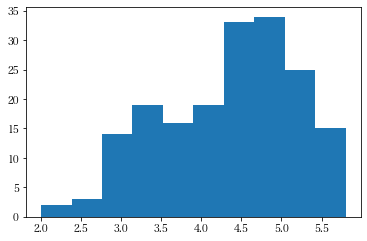

In [350]:
plt.hist(meanMeiryousa.loc[:,"mean"])

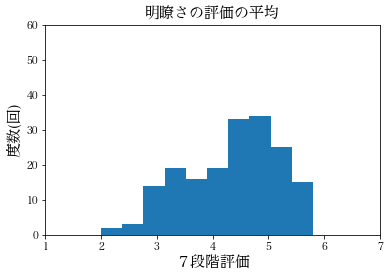

In [351]:
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.title("明瞭さの評価の平均", fontsize=15)  # (3) タイトル
plt.xlim(1, 7)                # x軸の表示範囲
plt.ylim(0, 60)  
plt.xlabel("７段階評価", fontsize=15)            # (4) x軸ラベル
plt.ylabel("度数(回)", fontsize=15) 
plt.hist(meanMeiryousa.loc[:, "mean"])

plt.savefig("./experiment/png/heikinchi/meiryousa3.png")
plt.show()


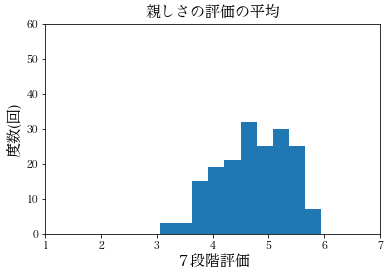

In [352]:
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.title("親しさの評価の平均", fontsize=15)  # (3) タイトル
plt.xlim(1, 7)                # x軸の表示範囲
plt.ylim(0, 60)  
plt.xlabel("７段階評価", fontsize=15)            # (4) x軸ラベル
plt.ylabel("度数(回)", fontsize=15) 

plt.hist(meanShitashisa.loc[:, "mean"])

plt.savefig("./experiment/png/heikinchi/shitashisa3.png")
plt.show()

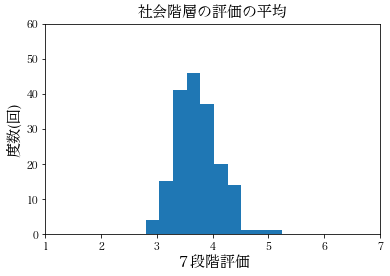

In [353]:
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.title("社会階層の評価の平均", fontsize=15)  # (3) タイトル
plt.xlim(1, 7)                # x軸の表示範囲
plt.ylim(0, 60)  
plt.hist(meanSyakaikaisou.loc[:, "mean"])



plt.xlabel("７段階評価", fontsize=15)            # (4) x軸ラベル
plt.ylabel("度数(回)", fontsize=15) 
plt.savefig("./experiment/png/heikinchi/syakaikaisou3.png")
plt.show()

In [354]:
Q1 = meanMeiryousa.loc[:,"mean"]
print(stats.shapiro(Q1))
Q1 = meanShitashisa.loc[:,"mean"]
print(stats.shapiro(Q1))
Q1 = meanSyakaikaisou.loc[:,"mean"]
print(stats.shapiro(Q1))

ShapiroResult(statistic=0.9730909466743469, pvalue=0.001481714891269803)
ShapiroResult(statistic=0.9810374975204468, pvalue=0.014983897097408772)
ShapiroResult(statistic=0.9828813672065735, pvalue=0.026409026235342026)


In [355]:
#########数字を変える


# onkyouMeiryousa.to_csv("./csv/SpeakingStyle/onkyouMeiryousa3.csv")
# onkyouShitashisa.to_csv("./csv/SpeakingStyle/onkyouShitashisa3.csv")
# onkyouSyakaikaisou.to_csv("./csv/SpeakingStyle/onkyouSyakaikaisou3.csv")

#########数字を変える

# meanMeiryousa.to_csv("./csv/SpeakingStyle/meanMeiryousa3.csv")
# meanShitashisa.to_csv("./csv/SpeakingStyle/meanShitashisa3.csv")
# meanSyakaikaisou.to_csv("./csv/SpeakingStyle/meanSyakaikaisou3.csv")

# 明瞭さ

In [390]:
import statsmodels.api as sm

x = meanMeiryousa.iloc[:,0:88]
y = meanMeiryousa.iloc[:,-1]# 目的変数 y 
# 全変数を用いた場合のAIC
print('全変数AIC = ', AIC(x, y))
# 全変数を用いた場合のBIC
#print('全変数BIC = ', BIC(x, y))
# AICによる変数増加法
beta_AIC, included_column_AIC, result_min_AIC = forward_stepwise(x, y, method='AIC')
print('回帰係数=',beta_AIC)#回帰係数の値が格納
print(included_column_AIC)#選ばれた変数が格納
print(result_min_AIC)
# # BICによる変数増加法
# beta_BIC, included_column_BIC, result_min_BIC = forward_stepwise(x, y, method='BIC')
# print(beta_BIC)
# print(included_column_BIC)
# print(result_min_BIC)

全変数AIC =  313.5754803076267
Baseline model with AIC:453.301310014291
Finally Add              88 with AIC 324.2880531412095
Baseline model with AIC:324.2880531412095
Finally Add              60 with AIC 304.4512039857078
Baseline model with AIC:304.4512039857078
Finally Add              81 with AIC 297.83173739924314
Baseline model with AIC:297.83173739924314
Finally Add              56 with AIC 293.8138259049385
Baseline model with AIC:293.8138259049385
Finally Add              38 with AIC 290.77139765784113
Baseline model with AIC:290.77139765784113
Finally Add              19 with AIC 286.9667519406395
Baseline model with AIC:286.9667519406395
Finally Add              67 with AIC 281.50901761990235
Baseline model with AIC:281.50901761990235
Finally Add               5 with AIC 276.14198760471464
Baseline model with AIC:276.14198760471464
Finally Add              47 with AIC 273.1680731666879
Baseline model with AIC:273.1680731666879
Finally Add              50 with AIC 271.290301464

/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/pandas/core/indexes/base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [391]:
#sns.pairplot(meanMeiryousa.loc[:,included_column_AIC])
#plt.show()

In [392]:
# juukaiki = DataFrame()
# setumei = included_column_AIC.insert(0, 'intercept')
# juukaiki["音響特徴量"]=setumei
# juukaiki["偏回帰係数"]=beta_AIC

In [393]:
# print(juukaiki.to_latex( position="hbtp", caption="重回帰分析の結果",label="juukaiki:tab"))

In [394]:
df_X = meanMeiryousa.loc[:,included_column_AIC]#説明変数
df_y = meanMeiryousa.iloc[:,-1]# 目的変数

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     23.06
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.37e-35
Time:                        20:13:38   Log-Likelihood:                -110.91
No. Observations:                 180   AIC:                             259.8
Df Residuals:                     161   BIC:                             320.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [395]:
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.1473,0.952,7.504,0.000,5.266,9.028
equivalentSoundLevel_dBp,0.0922,0.010,9.191,0.000,0.072,0.112
alphaRatioV_sma3nz_stddevNorm,-0.9241,0.187,-4.936,0.000,-1.294,-0.554
spectralFluxUV_sma3nz_amean,-2.7957,0.599,-4.669,0.000,-3.978,-1.613
F3bandwidth_sma3nz_stddevNorm,1.2260,0.399,3.071,0.003,0.438,2.014
logRelF0-H1-H2_sma3nz_stddevNorm,0.0043,0.001,3.238,0.001,0.002,0.007
loudness_sma3_meanFallingSlope,0.0720,0.028,2.594,0.010,0.017,0.127
spectralFluxV_sma3nz_amean,-2.3411,0.568,-4.125,0.000,-3.462,-1.220
F0semitoneFrom27.5Hz_sma3nz_percentile80.0,0.0499,0.013,3.939,0.000,0.025,0.075
F2frequency_sma3nz_amean,-0.0012,0.000,-2.508,0.013,-0.002,-0.000


In [396]:
#####数字を変える

# 相関係数を算出

# corr = np.corrcoef(df_X.iloc[:,1:].values.T)
# plt.figure(figsize=(30,30))
# # ヒートマップとして可視化
# hm   = sns.heatmap(
#                  corr,                         # データ
#                  annot=True,                   # セルに値入力
#                  fmt='.2f',                    # 出力フォーマット
#                  annot_kws={'size': 10},        # セル入力値のサイズ
#                  yticklabels=list(df_X.iloc[:,1:].columns), # 列名を出力
#                  xticklabels=list(df_X.iloc[:,1:].columns)# x軸を出力
#                     ) 
# hm.get_figure().savefig("./experiment/png/kaikkiMeiryousa.png")

# plt.show()

In [397]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df_X.columns[1:]
vif["VIF Factor"] = [variance_inflation_factor(df_X.values, i+1) for i in range(df_X.shape[1]-1)]
#vif = vif.set_index("features")

In [398]:
vif
vif.to_csv("./csv/vifI.csv")


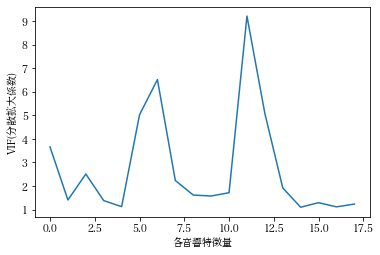

In [399]:
#vifをグラフ化する
vif = vif.reset_index(inplace=False)
plt.plot(vif["VIF Factor"])
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.xlabel("各音響特徴量")
plt.ylabel("VIF(分散拡大係数)")
plt.savefig("./experiment/png/VIFmeiryousadf3")

In [400]:
df_X = meanMeiryousa.loc[:,vif[vif['VIF Factor']<5.0]["features"]]#説明変数
df_y = meanMeiryousa.iloc[:,-1]# 目的変数

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     24.28
Date:                Tue, 30 May 2023   Prob (F-statistic):           4.59e-33
Time:                        20:13:46   Log-Likelihood:                -125.00
No. Observations:                 180   AIC:                             280.0
Df Residuals:                     165   BIC:                             327.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [401]:
df_X = meanMeiryousa.loc[:, vif[vif['VIF Factor'] < 4.0]["features"]]  # 説明変数
df_y = meanMeiryousa.iloc[:, -1]  # 目的変数

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     24.28
Date:                Tue, 30 May 2023   Prob (F-statistic):           4.59e-33
Time:                        20:13:46   Log-Likelihood:                -125.00
No. Observations:                 180   AIC:                             280.0
Df Residuals:                     165   BIC:                             327.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [402]:
hyoudf = DataFrame(result.summary().tables[1])
hyoudf.iloc[0,1]="coef"
hyoudf.columns = hyoudf.iloc[0,:]
hyoudf = hyoudf.drop(0)
hyoudf = hyoudf.set_index(hyoudf.columns[0])
hyoudf

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,6.7481,0.957,7.054,0.000,4.859,8.637
equivalentSoundLevel_dBp,0.0901,0.009,10.181,0.000,0.073,0.108
alphaRatioV_sma3nz_stddevNorm,-0.9500,0.199,-4.774,0.000,-1.343,-0.557
spectralFluxUV_sma3nz_amean,-2.5804,0.581,-4.439,0.000,-3.728,-1.433
F3bandwidth_sma3nz_stddevNorm,1.1880,0.421,2.825,0.005,0.358,2.018
logRelF0-H1-H2_sma3nz_stddevNorm,0.0030,0.001,2.163,0.032,0.000,0.006
F0semitoneFrom27.5Hz_sma3nz_percentile80.0,0.0426,0.013,3.207,0.002,0.016,0.069
F2frequency_sma3nz_amean,-0.0008,0.000,-1.629,0.105,-0.002,0.000
F2bandwidth_sma3nz_stddevNorm,1.4931,0.479,3.115,0.002,0.547,2.440


In [403]:
# 偏回帰係数の値と説明変数の意味を取得し、csvにする
model = hyoudf.iloc[:,0]
model.to_csv("./csv/modelI.csv")

# 親しさ

In [404]:
x = meanShitashisa.iloc[:,0:88]
y = meanShitashisa.iloc[:,-1]# 目的変数 y 
# 全変数を用いた場合のAIC
print('全変数AIC = ', AIC(x, y))
# 全変数を用いた場合のBIC
#print('全変数BIC = ', BIC(x, y))
# AICによる変数増加法
beta_AIC, included_column_AIC, result_min_AIC = forward_stepwise(x, y, method='AIC')
print(beta_AIC)
print(included_column_AIC)
print(result_min_AIC)

全変数AIC =  222.0921900193365
Baseline model with AIC:338.29259183427683
Finally Add              88 with AIC 252.19355531972747
Baseline model with AIC:252.19355531972747
Finally Add              59 with AIC 237.3894181566676
Baseline model with AIC:237.3894181566676
Finally Add              37 with AIC 213.70018996143244
Baseline model with AIC:213.70018996143244
Finally Add              70 with AIC 206.71534058418501
Baseline model with AIC:206.71534058418501
Finally Add              31 with AIC 201.69009732074994
Baseline model with AIC:201.69009732074994
Finally Add              72 with AIC 198.17827483253046
Baseline model with AIC:198.17827483253046
Finally Add               1 with AIC 194.84532151495233
Baseline model with AIC:194.84532151495233
Finally Add               9 with AIC 191.34808318939014
Baseline model with AIC:191.34808318939014
Finally Add              66 with AIC 189.07425233750433
Baseline model with AIC:189.07425233750433
Finally Add              79 with AIC 186

/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/pandas/core/indexes/base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [405]:
#sns.pairplot(meanShitashisa.loc[:,included_column_AIC])
#plt.show()

In [406]:
df_X = meanShitashisa.loc[:,included_column_AIC]#説明変数
df_y = meanShitashisa.iloc[:,-1]# 目的変数

df_X = sm.add_constant(df_X)#バイアス項を追加

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     18.15
Date:                Tue, 30 May 2023   Prob (F-statistic):           5.20e-30
Time:                        20:13:53   Log-Likelihood:                -68.412
No. Observations:                 180   AIC:                             174.8
Df Residuals:                     161   BIC:                             235.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [407]:
#####数字を変える

#####数字を変える

# 相関係数を算出

# corr = np.corrcoef(df_X.iloc[:,1:].values.T)
# plt.figure(figsize=(30,30))
# # ヒートマップとして可視化
# hm   = sns.heatmap(
#                  corr,                         # データ
#                  annot=True,                   # セルに値入力
#                  fmt='.2f',                    # 出力フォーマット
#                  annot_kws={'size': 10},        # セル入力値のサイズ
#                  yticklabels=list(df_X.iloc[:,1:].columns), # 列名を出力
#                  xticklabels=list(df_X.iloc[:,1:].columns)# x軸を出力
#                     ) 
# hm.get_figure().savefig("./experiment/png/kaikkiShitashisa.png")

# plt.show()

In [408]:
vif = pd.DataFrame()
vif["features"] = df_X.columns[1:]
vif["VIF Factor"] = [variance_inflation_factor(df_X.values, i+1) for i in range(df_X.shape[1]-1)]
#vif = vif.set_index("features")

In [409]:
len(vif[vif['VIF Factor']<5.0])

16

In [410]:
vif
vif.to_csv("./csv/vifF.csv")


In [411]:
df_X = meanShitashisa.loc[:,vif[vif['VIF Factor']<5.0]["features"]]#説明変数
df_y = meanShitashisa.iloc[:,-1]# 目的変数

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     18.17
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.78e-28
Time:                        20:13:58   Log-Likelihood:                -76.004
No. Observations:                 180   AIC:                             186.0
Df Residuals:                     163   BIC:                             240.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [412]:
hyoudf = DataFrame(result.summary().tables[1])
hyoudf.iloc[0,1]=" coef"
hyoudf.columns = hyoudf.iloc[0,:]
hyoudf = hyoudf.drop(0)
hyoudf = hyoudf.set_index(hyoudf.columns[0])
hyoudf

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,5.2527,0.722,7.273,0.000,3.827,6.679
equivalentSoundLevel_dBp,0.0380,0.007,5.175,0.000,0.024,0.053
alphaRatioV_sma3nz_amean,0.0716,0.015,4.643,0.000,0.041,0.102
logRelF0-H1-H2_sma3nz_amean,0.0374,0.011,3.539,0.001,0.017,0.058
mfcc1V_sma3nz_stddevNorm,-0.2374,0.067,-3.558,0.000,-0.369,-0.106
jitterLocal_sma3nz_amean,7.3574,3.029,2.429,0.016,1.377,13.338
mfcc2V_sma3nz_stddevNorm,-0.0074,0.003,-2.264,0.025,-0.014,-0.001
F0semitoneFrom27.5Hz_sma3nz_amean,0.0359,0.015,2.380,0.018,0.006,0.066
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,0.0021,0.001,1.803,0.073,-0.000,0.004


In [413]:
# 偏回帰係数の値と説明変数の意味を取得し、csvにする
model = hyoudf.iloc[:,0]
model.to_csv("./csv/modelF.csv")

In [414]:
df_X = meanShitashisa.loc[:,vif[vif['VIF Factor']<4.0]["features"]]#説明変数
df_y = meanShitashisa.iloc[:,-1]# 目的変数

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     18.08
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.55e-24
Time:                        20:14:01   Log-Likelihood:                -93.205
No. Observations:                 180   AIC:                             212.4
Df Residuals:                     167   BIC:                             253.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

# 社会階層

In [422]:
x = meanSyakaikaisou.iloc[:,0:88]
y = meanSyakaikaisou.iloc[:,-1]# 目的変数 y 
# 全変数を用いた場合のAIC
print('全変数AIC = ', AIC(x, y))
# 全変数を用いた場合のBIC
#print('全変数BIC = ', BIC(x, y))
# AICによる変数増加法
beta_AIC, included_column_AIC, result_min_AIC = forward_stepwise(x, y, method='AIC')
print(beta_AIC)
print(included_column_AIC)
print(result_min_AIC)

全変数AIC =  191.5331243807862
Baseline model with AIC:170.08182095720935
Finally Add              21 with AIC 160.0222118459693
Baseline model with AIC:160.0222118459693
Finally Add              44 with AIC 152.80356123099
Baseline model with AIC:152.80356123099
Finally Add              31 with AIC 148.6138357678024
Baseline model with AIC:148.6138357678024
Finally Add              63 with AIC 145.10208073692638
Baseline model with AIC:145.10208073692638
Finally Add              20 with AIC 143.0292036390349
Baseline model with AIC:143.0292036390349
Finally Add              66 with AIC 140.9943811479888
Baseline model with AIC:140.9943811479888
Finally Add              87 with AIC 139.29918933741743
Baseline model with AIC:139.29918933741743
Finally Add              58 with AIC 136.7019547874309
Baseline model with AIC:136.7019547874309
Finally Add              50 with AIC 135.5787653345282
Baseline model with AIC:135.5787653345282
Finally Add              73 with AIC 132.83886339764285


/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/pandas/core/indexes/base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [416]:
#sns.pairplot(meanSyakaikaisou.loc[:,included_column_AIC])
#plt.show()

In [417]:
#社会階層
df_X = meanSyakaikaisou.loc[:,included_column_AIC]#説明変数
df_y = meanSyakaikaisou.iloc[:,-1]# 目的変数

df_X = sm.add_constant(df_X)#バイアス項を追加

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     5.367
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.02e-08
Time:                        20:14:05   Log-Likelihood:                -48.099
No. Observations:                 180   AIC:                             128.2
Df Residuals:                     164   BIC:                             179.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

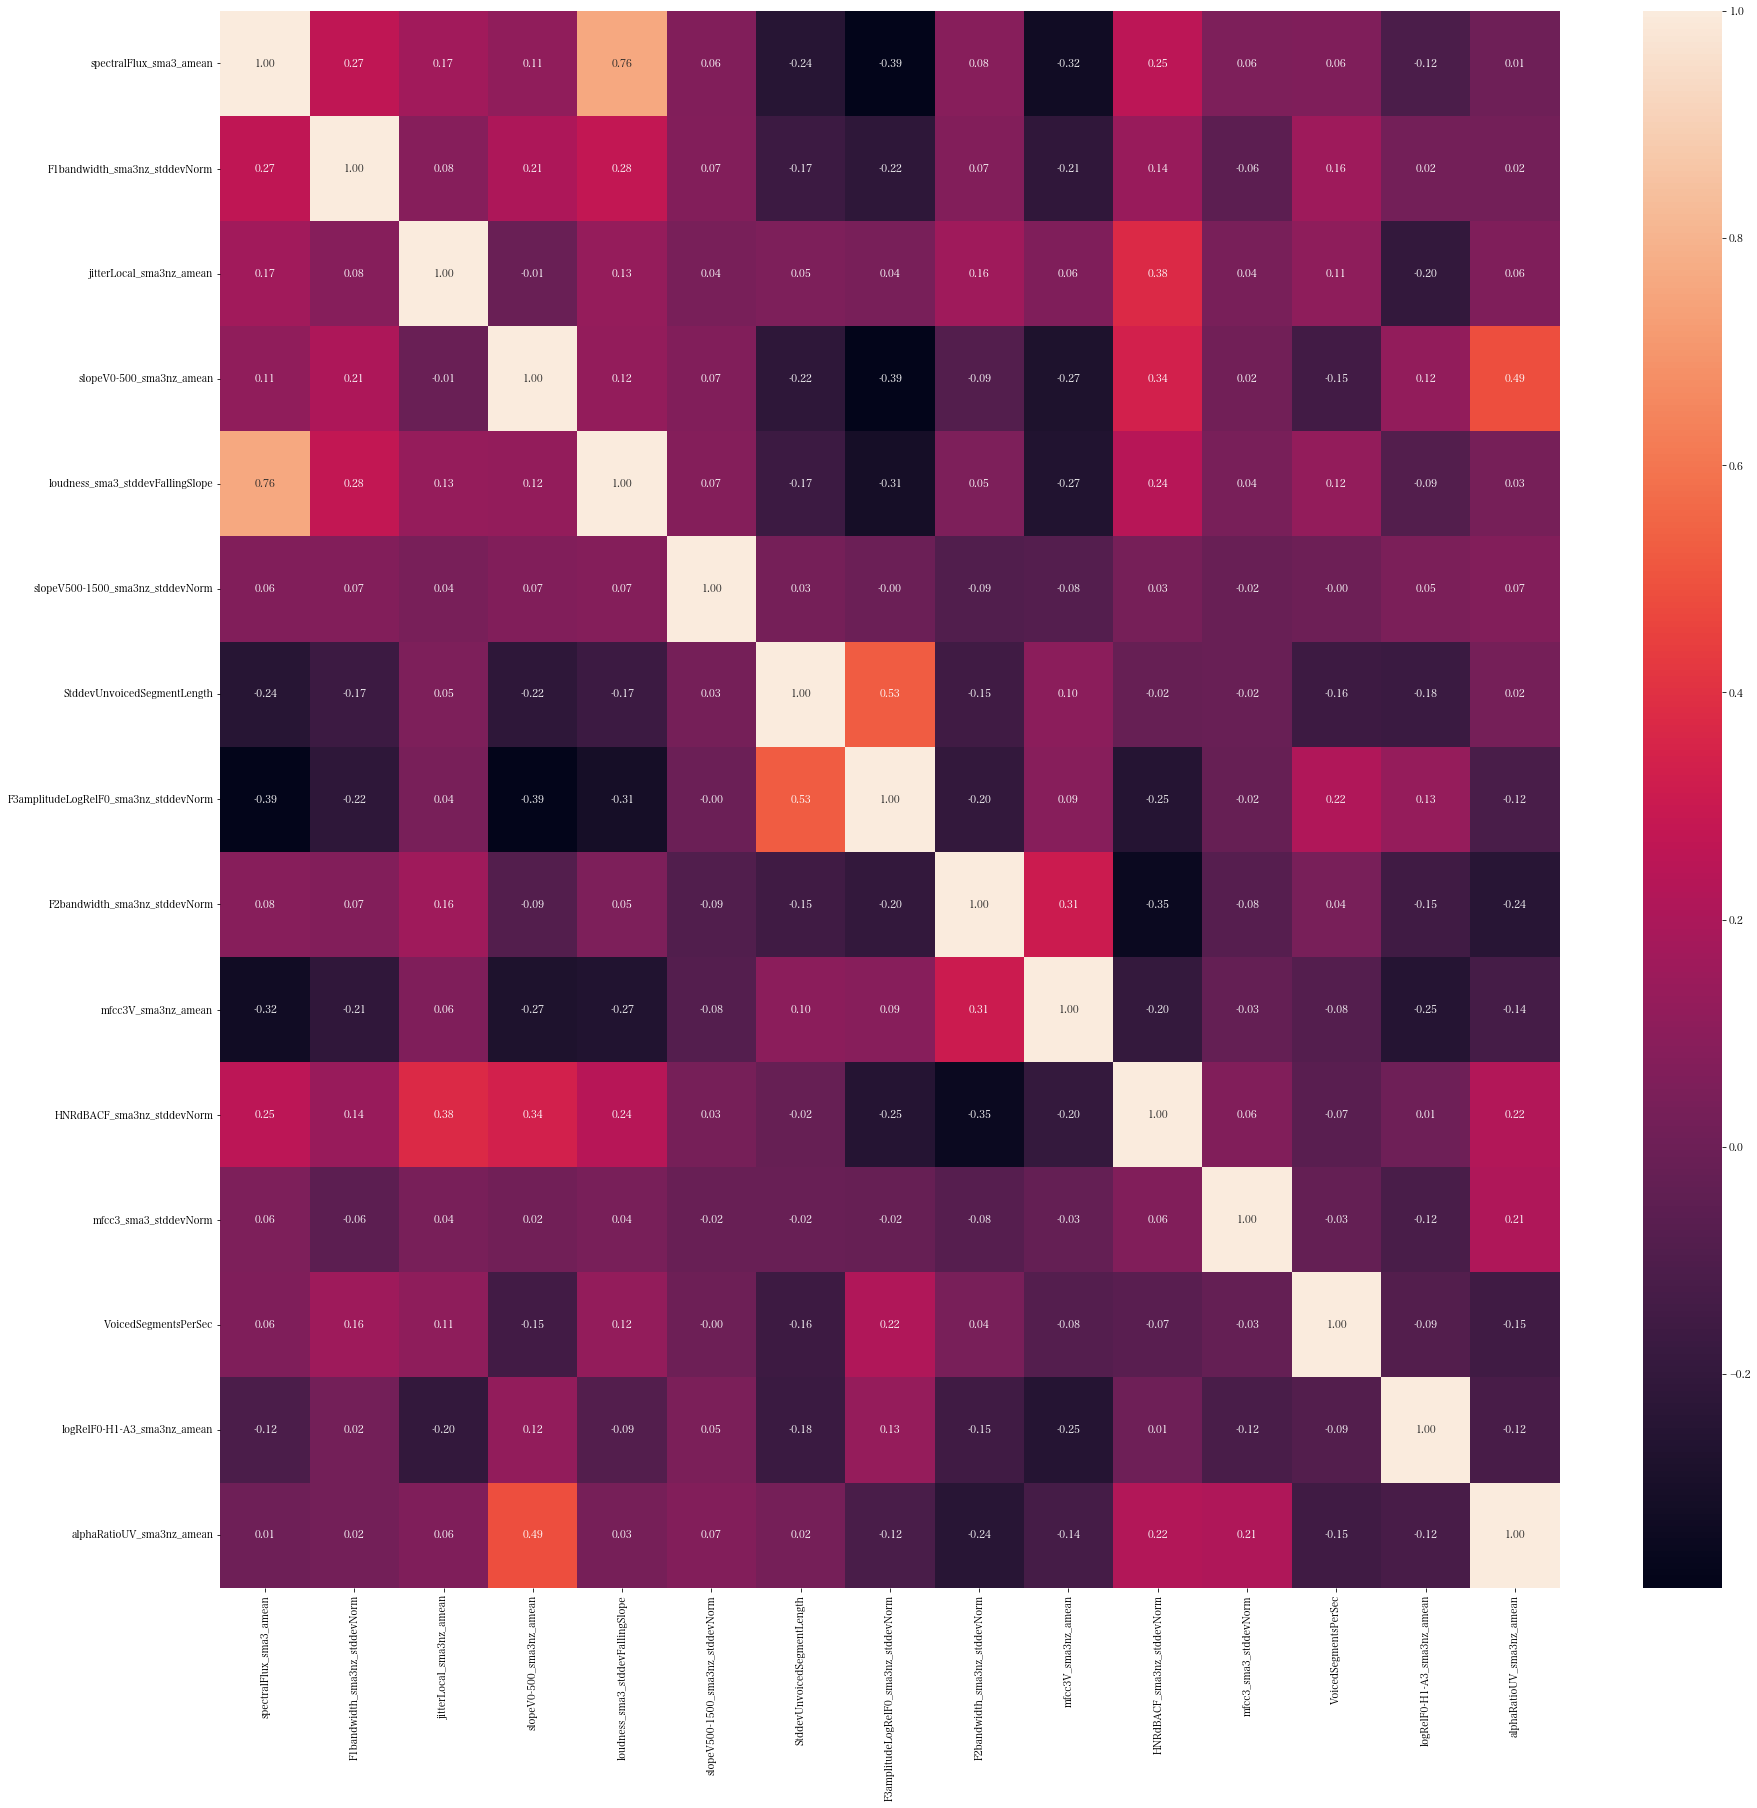

In [418]:
#####数字を変える

#####数字を変える

# 相関係数を算出

corr = np.corrcoef(df_X.iloc[:,1:].values.T)
plt.figure(figsize=(30,30))
# ヒートマップとして可視化
hm   = sns.heatmap(
                 corr,                         # データ
                 annot=True,                   # セルに値入力
                 fmt='.2f',                    # 出力フォーマット
                 annot_kws={'size': 10},        # セル入力値のサイズ
                 yticklabels=list(df_X.iloc[:,1:].columns), # 列名を出力
                 xticklabels=list(df_X.iloc[:,1:].columns)# x軸を出力
                    ) 

hm.get_figure().savefig("./experiment/png/kaikkiSyakaikaisou.png")

plt.show()

In [419]:
vif = pd.DataFrame()
vif["features"] = df_X.columns[1:]
vif["VIF Factor"] = [variance_inflation_factor(df_X.values, i+1) for i in range(df_X.shape[1]-1)]


In [420]:
#vif = vif.set_index("features")
vif
vif.to_csv("./csv/vifC.csv")


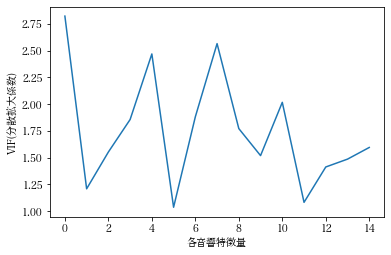

In [385]:
#vifをグラフ化する
vif = vif.reset_index(inplace=False)
plt.plot(vif["VIF Factor"])
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.xlabel("各音響特徴量")
plt.ylabel("VIF(分散拡大係数)")
plt.savefig("./experiment/png/VIFsyakaikaisoudf3")

In [386]:
len(vif[vif['VIF Factor']<5.0])

15

In [387]:
df_X = meanSyakaikaisou.loc[:,vif[vif['VIF Factor']<5.0]["features"]]#説明変数
df_y = meanSyakaikaisou.iloc[:,-1]# 目的変数

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     5.367
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.02e-08
Time:                        20:11:16   Log-Likelihood:                -48.099
No. Observations:                 180   AIC:                             128.2
Df Residuals:                     164   BIC:                             179.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [388]:
hyoudf = DataFrame(result.summary().tables[1])
hyoudf.iloc[0,1]="coef"
hyoudf.columns = hyoudf.iloc[0,:]
hyoudf = hyoudf.drop(0)
hyoudf = hyoudf.set_index(hyoudf.columns[0])
hyoudf

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,2.6571,0.269,9.880,0.000,2.126,3.188
spectralFlux_sma3_amean,-1.3834,0.304,-4.553,0.000,-1.983,-0.783
F1bandwidth_sma3nz_stddevNorm,1.0873,0.493,2.205,0.029,0.114,2.061
jitterLocal_sma3nz_amean,-9.2110,2.926,-3.148,0.002,-14.988,-3.434
slopeV0-500_sma3nz_amean,0.5012,1.514,0.331,0.741,-2.489,3.491
loudness_sma3_stddevFallingSlope,0.0363,0.023,1.607,0.110,-0.008,0.081
slopeV500-1500_sma3nz_stddevNorm,-0.0003,0.000,-1.969,0.051,-0.001,8.41e-07
StddevUnvoicedSegmentLength,1.9705,0.571,3.449,0.001,0.842,3.099
F3amplitudeLogRelF0_sma3nz_stddevNorm,-0.3335,0.145,-2.307,0.022,-0.619,-0.048


In [389]:
# 偏回帰係数の値と説明変数の意味を取得し、csvにする
model = hyoudf.iloc[:, 0]
model.to_csv("./csv/modelC.csv")


In [403]:
print(hyoudf.to_latex( position="hbtp", caption="偏回帰係数の値(社会階層)",label="SyakaikaisouHenkaiki:tab"))

\begin{table}[hbtp]
\centering
\caption{偏回帰係数の値(社会階層)}
\label{SyakaikaisouHenkaiki:tab}
\begin{tabular}{lllllll}
\toprule
0 &        coef &    std err &          t &   P>|t| &     [0.025 &     0.975] \\
                                           &             &            &            &         &            &            \\
\midrule
const                                      &      5.0008 &      0.765 &      6.533 &   0.000 &      3.488 &      6.514 \\
F1bandwidth\_sma3nz\_stddevNorm              &      1.6688 &      0.626 &      2.665 &   0.009 &      0.431 &      2.906 \\
F0semitoneFrom27.5Hz\_sma3nz\_percentile50.0 &     -0.0174 &      0.014 &     -1.239 &   0.217 &     -0.045 &      0.010 \\
F3bandwidth\_sma3nz\_amean                   &     -0.0007 &      0.000 &     -2.099 &   0.038 &     -0.001 &     -4e-05 \\
equivalentSoundLevel\_dBp                   &      0.0143 &      0.008 &      1.681 &   0.095 &     -0.003 &      0.031 \\
spectralFluxUV\_sma3nz\_amean                &   

In [266]:
df_X = meanSyakaikaisou.loc[:,vif[vif['VIF Factor']<3.0]["features"]]#説明変数
df_y = meanSyakaikaisou.iloc[:,-1]# 目的変数

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.556
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           3.02e-06
Time:                        05:40:42   Log-Likelihood:                -76.506
No. Observations:                 162   AIC:                             179.0
Df Residuals:                     149   BIC:                             219.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
#ここは偏回帰係数の値を取得
result.summary().tables[1]

In [481]:
#音響特徴量と偏回帰係数の値を取得、この先wavファイルを入力したら、3尺度の値を返す関数を作るときに必要になる。
henkaiki = DataFrame(result.summary().tables[1])
henkaiki.iloc[0,0] = "feature"
henkaiki = henkaiki.rename(columns=henkaiki.iloc[0])
#henkaiki = henkaiki.drop(henkaiki.columns[[0]], axis=1) #最初の列削除
henkaiki = henkaiki.drop(henkaiki.index[[0]], axis=0) #最初の行削除
henkaiki = henkaiki.drop(henkaiki.columns[[2,3,4,5,6]], axis=1)
henkaiki

,feature,coef
1,const,5.0008
2,F1bandwidth_sma3nz_stddevNorm,1.6688
3,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,-0.0174
4,F3bandwidth_sma3nz_amean,-0.0007
5,equivalentSoundLevel_dBp,0.0143
6,spectralFluxUV_sma3nz_amean,-1.6885
7,F3bandwidth_sma3nz_stddevNorm,0.3702
8,StddevUnvoicedSegmentLength,1.6033
9,F2bandwidth_sma3nz_stddevNorm,0.9219
10,logRelF0-H1-A3_sma3nz_amean,0.0298


In [349]:
hyouKaiki = pd.read_excel("./xlsx/hyouKaiki.xlsx", index_col=0)
hyouAIC = pd.read_excel("./xlsx/hyouAIC.xlsx",index_col=0)
hyouICC= pd.read_excel("./xlsx/hyouICC.xlsx", index_col=0)

In [350]:
hyouICC = hyouICC.iloc[:,0:-2].T

In [351]:
print(hyouICC.to_latex( position="H", caption="3尺度それぞれのICC(級内相関係数)の比較",label="ICCifc:tab"))

\begin{table}[H]
\centering
\caption{3尺度それぞれのICC(級内相関係数)の比較}
\label{ICCifc:tab}
\begin{tabular}{llllllllll}
\toprule
{} &   明瞭さ &   明瞭さ &   明瞭さ &   親しさ &   親しさ &   親しさ &  社会階層 &  社会階層 &  社会階層 \\
\midrule
Unnamed: 1                    &  ICC1 &  ICC2 &  ICC3 &  ICC1 &  ICC2 &  ICC3 &  ICC1 &  ICC2 &  ICC3 \\
全ての被験者                        &  0.29 &   0.3 &  0.35 &  0.29 &   0.3 &  0.38 &  0.17 &  0.18 &  0.23 \\
差の平均値 \$<\$ 1.6                 &  0.29 &   0.3 &  0.36 &  0.31 &  0.32 &  0.39 &  0.17 &  0.18 &  0.25 \\
差の平均値 \$<\$1.35                 &  0.25 &  0.26 &  0.32 &  0.28 &  0.29 &  0.38 &   0.2 &  0.21 &  0.29 \\
差の平均値 \$<\$ 1.25                &  0.23 &  0.24 &   0.3 &  0.27 &  0.28 &  0.41 &  0.17 &  0.18 &  0.28 \\
差の平均値 \$<\$ 1.00                &  0.17 &  0.19 &  0.26 &  0.22 &  0.25 &  0.44 &  0.08 &  0.12 &  0.22 \\
重み付きカッパ係数をもとに除外               &  0.33 &  0.33 &  0.38 &  0.31 &  0.32 &  0.36 &  0.18 &  0.18 &  0.22 \\
重み付きカッパ係数 \$+\$ 差の平均値 \$< 1.6\$   &  0.33 &  0.34 &  

In [145]:
print(hyouAIC.to_latex( position="hbtp", caption="AIC(赤池情報量基準)の比較",label="AIC:tab"))

\begin{table}[hbtp]
\centering
\caption{AIC(赤池情報量基準)の比較}
\label{AIC:tab}
\begin{tabular}{llrrrrr}
\toprule
{} &      Unnamed: 1 &  全ての被験者 &  カッパ係数をもとに除外 &  差の平均値 > 1.6 &  差の平均値 > 1.35 &  差の平均値 > 1.25 \\
\midrule
NaN  &            被験者数 &   32.00 &        27.00 &        24.00 &         18.00 &         13.00 \\
明瞭さ  &       AIC（88変数） &  312.76 &       262.82 &       245.82 &        198.39 &        272.02 \\
明瞭さ  &   AIC（ステップワイズ法） &  275.81 &       220.70 &       200.90 &        178.82 &        144.60 \\
明瞭さ  &  AIC（VIF < 5.0） &  401.80 &       413.90 &       388.20 &        326.30 &        151.90 \\
明瞭さ  &  AIC（VIF < 3.0） &  438.70 &       455.40 &       426.80 &        344.10 &        226.70 \\
親しさ  &       AIC（88変数） &  265.39 &       282.82 &       287.78 &        239.71 &        189.04 \\
親しさ  &   AIC（ステップワイズ法） &  225.00 &       219.50 &       225.90 &        194.91 &        122.00 \\
親しさ  &  AIC（VIF < 5.0） &  229.20 &       260.30 &       230.70 &        194.90 &        163.80 \\
親しさ 

In [141]:
print(hyouKaiki.to_latex( position="hbtp", caption="決定係数の比較",label="kaiki:tab"))

\begin{table}[hbtp]
\centering
\caption{決定係数の比較}
\label{kaiki:tab}
\begin{tabular}{llrrrrr}
\toprule
{} &                 Unnamed: 1 &  全ての被験者 &  カッパ係数をもとに除外 &  差の平均値 > 1.6 &  差の平均値 > 1.35 &  差の平均値 > 1.25 \\
\midrule
NaN  &                       被験者数 &   32.00 &        27.00 &        24.00 &         18.00 &         13.00 \\
明瞭さ  &  ステップワイズ法で選択された変数の調整済み決定係数 &    0.75 &         0.84 &         0.85 &          0.84 &          0.76 \\
明瞭さ  &        調整済み決定係数（VIF < 5.0） &    0.46 &         0.38 &         0.39 &          0.48 &          0.74 \\
明瞭さ  &        調整済み決定係数（VIF < 3.0） &    0.32 &         0.14 &         0.14 &          0.38 &          0.44 \\
親しさ  &  ステップワイズ法で選択された変数の調整済み決定係数 &    0.68 &         0.70 &         0.67 &          0.63 &          0.75 \\
親しさ  &        調整済み決定係数（VIF < 5.0） &    0.67 &         0.59 &         0.65 &          0.63 &          0.64 \\
親しさ  &        調整済み決定係数（VIF < 3.0） &    0.54 &         0.06 &         0.33 &          0.55 &          0.39 \\
社会階層 &  ステップワイズ法で選択さ

In [642]:
hyouICC.T

,被験者数,ICC1,ICC2,ICC3
全ての被験者,32.0,0.37,0.37,0.42
カッパ係数をもとに排除,27.0,0.40,0.40,0.43
差の平均値が1.6以下を排除,24.0,0.42,0.42,0.45
差の平均値が1.35以下を排除,18.0,0.44,0.44,0.48
差の平均値が1.25以下を排除,13.0,0.44,0.44,0.49
差の平均値が1.00以下を排除,7.0,0.42,0.44,0.54


In [643]:
print(hyouICC.T.to_latex( position="hbtp", caption="ICC(級内相関係数)の比較",label="ICC:tab"))

\begin{table}[hbtp]
\centering
\caption{ICC(級内相関係数)の比較}
\label{ICC:tab}
\begin{tabular}{lrrrr}
\toprule
{} &  被験者数 &  ICC1 &  ICC2 &  ICC3 \\
\midrule
全ての被験者          &  32.0 &  0.37 &  0.37 &  0.42 \\
カッパ係数をもとに排除     &  27.0 &  0.40 &  0.40 &  0.43 \\
差の平均値が1.6以下を排除  &  24.0 &  0.42 &  0.42 &  0.45 \\
差の平均値が1.35以下を排除 &  18.0 &  0.44 &  0.44 &  0.48 \\
差の平均値が1.25以下を排除 &  13.0 &  0.44 &  0.44 &  0.49 \\
差の平均値が1.00以下を排除 &   7.0 &  0.42 &  0.44 &  0.54 \\
\bottomrule
\end{tabular}
\end{table}



In [1383]:
#データフレームをtexの表に変換
print(tokutyou.iloc[0:3,2:39].T.to_latex( position="hbtp", caption="音響特徴量の値",label="tokutyou:tab"))

\begin{table}[hbtp]
\centering
\caption{音響特徴量の値}
\label{tokutyou:tab}
\begin{tabular}{lrrr}
\toprule
file &  ./experiment/wav/K001/K001\_004/K001\_004\_IC01\_cut004.wav &  ./experiment/wav/K001/K001\_004/K001\_004\_IC01\_cut024.wav &  ./experiment/wav/K001/K001\_004/K001\_004\_IC01\_cut049.wav \\
\midrule
F0semitoneFrom27.5Hz\_sma3nz\_percentile20.0     &                                              34.05 &                                              35.25 &                                              39.33 \\
F0semitoneFrom27.5Hz\_sma3nz\_percentile50.0     &                                              36.37 &                                              37.30 &                                              41.50 \\
F0semitoneFrom27.5Hz\_sma3nz\_percentile80.0     &                                              39.58 &                                              38.12 &                                              42.04 \\
F0semitoneFrom27.5Hz\_sma3nz\_pctlrange0-2       &          

In [524]:
corr = np.corrcoef(tokutyou.values.T)
corrdf = DataFrame(corr)

corrdf = corrdf.astype('float64')

corrHigh = corrdf[(corrdf>=0.7)&(corrdf < 0.99999)].stack()
corrHigh = DataFrame(corrHigh)
corrLow = corrdf[(corrdf<=-0.7)&(corrdf>-0.99999)].stack()
corrLow = DataFrame(corrLow)

In [525]:
corrLow.T

29        44                            45                      \
         63        45        51        57        44        50        56   
0 -0.829851 -0.894558 -0.862228 -0.844708 -0.894558 -0.878395 -0.870505   

                   50                            51                      \
         83        45        51        57        44        50        56   
0 -0.708337 -0.878395 -0.893178 -0.879149 -0.862228 -0.893178 -0.884014   

         56                            57                            58  \
         45        51        57        44        50        56        70   
0 -0.870505 -0.884014 -0.895687 -0.844708 -0.879149 -0.895687 -0.702951   

         63        70        76        77       82        83           
         29        58        77        76       83        45       82  
0 -0.829851 -0.702951 -0.912371 -0.912371 -0.70435 -0.708337 -0.70435

In [526]:
corrHigh.T

0                            1         2                  3   \
         2        3         4         5         0         3        0    
0  0.854338  0.95028  0.916468  0.792077  0.854338  0.766228  0.95028   

                             4                   5         6         7   \
         2         4         0         3         1         7         6    
0  0.766228  0.874267  0.916468  0.874267  0.792077  0.839005  0.839005   

         8         9   ...        72        74       78        80            \
         9         8   ...        26        28       62        10        13   
0  0.852222  0.852222  ...  0.947736  0.922893  0.77473  0.757945  0.706143   

                                                 87                      \
         14        15        20        66        10        13        14   
0  0.770771  0.729709  0.795991  0.716059  0.831186  0.760225  0.844365   

                                           
         15        16        20        66  
0  0.808136  0.719208  0.749643  0.748417  

[1 rows x 158 columns]

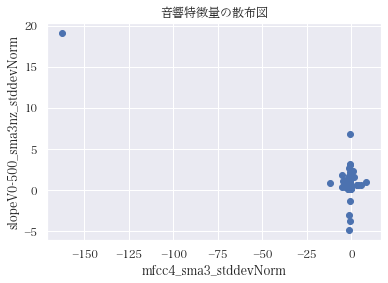

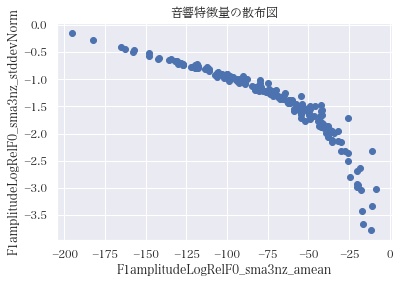

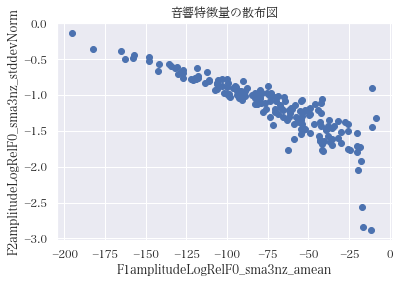

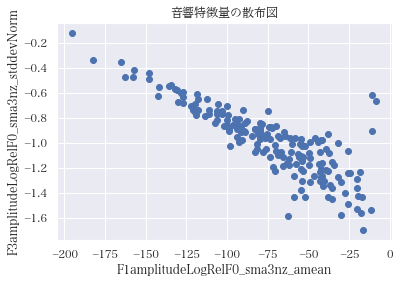

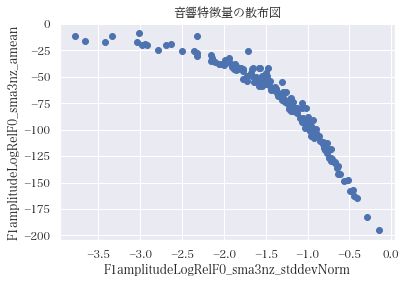

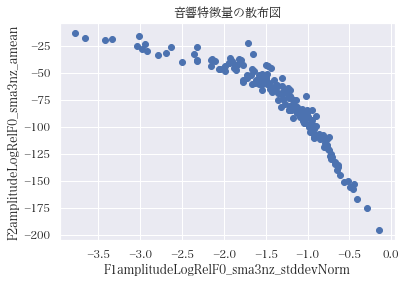

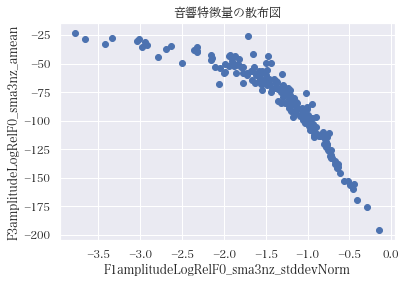

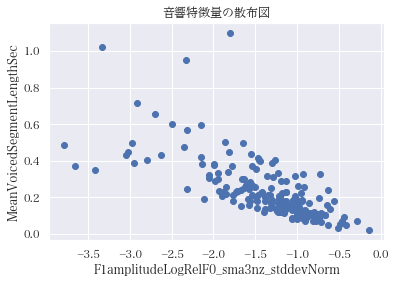

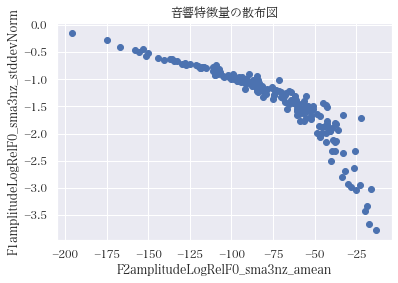

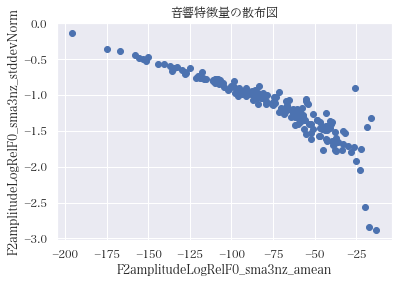

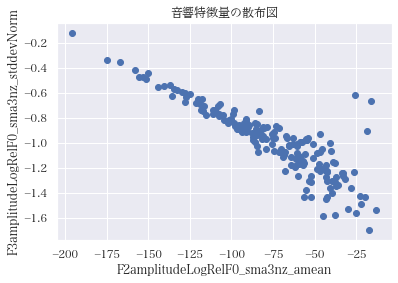

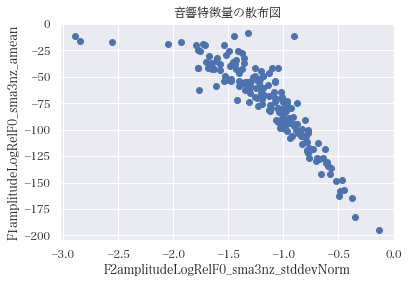

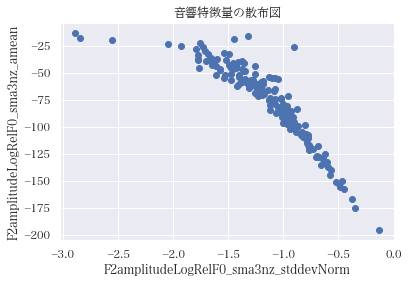

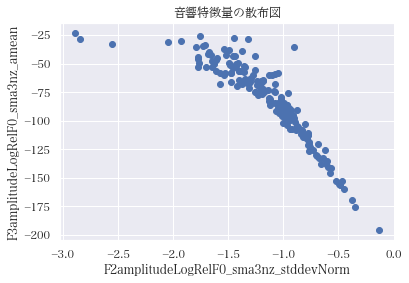

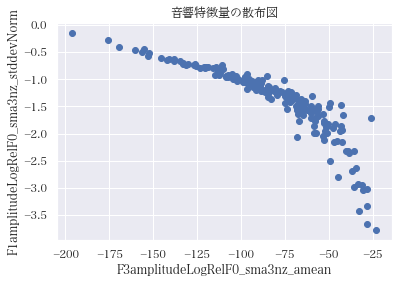

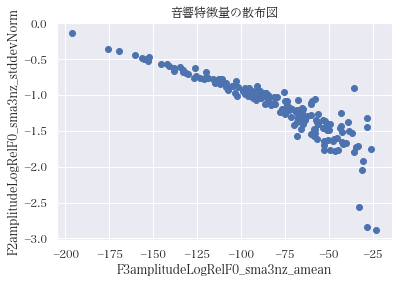

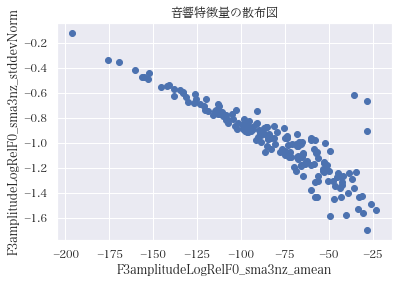

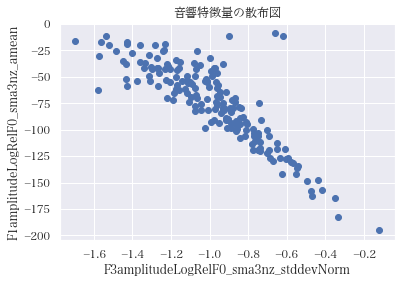

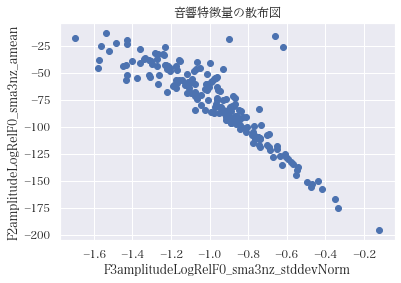

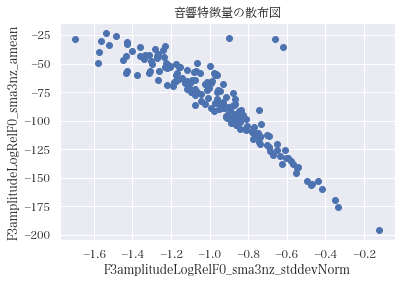

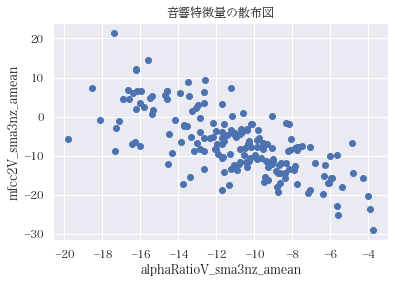

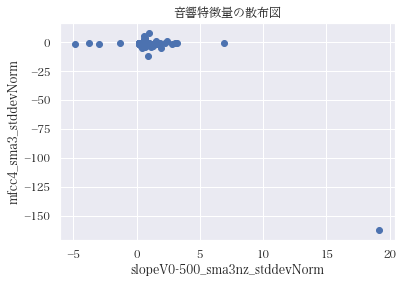

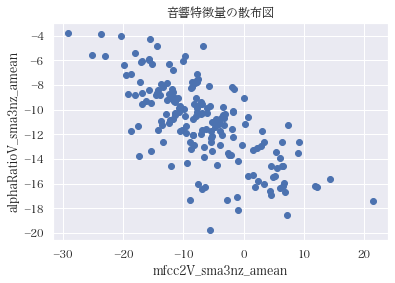

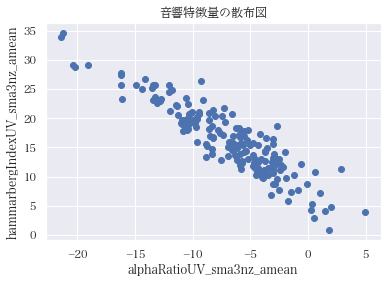

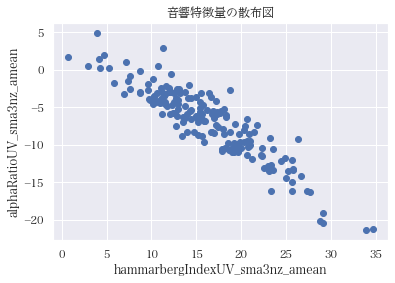

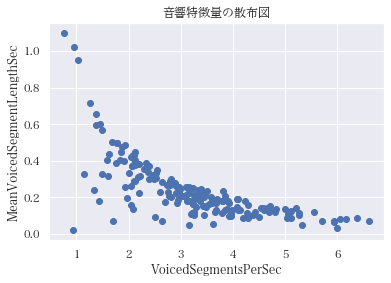

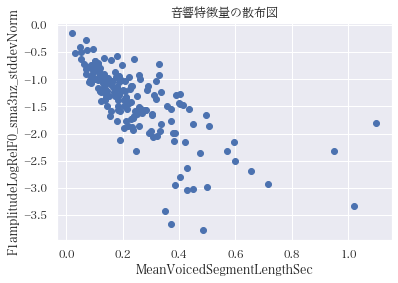

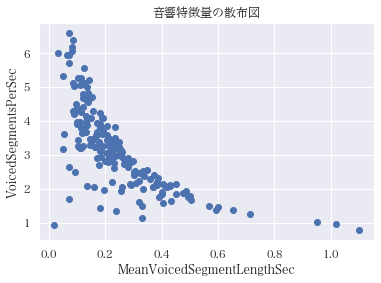

In [528]:
i = 0
for i in range(len(corrLow.index)):
    plt.scatter(tokutyou[tokutyou.columns[corrLow.index[i][0]]], tokutyou[tokutyou.columns[corrLow.index[i][1]]])
    plt.rcParams['font.family'] = "Hiragino Mincho ProN"
    plt.title("音響特徴量の散布図")
    plt.xlabel(tokutyou.columns[corrLow.index[i][0]])
    plt.ylabel(tokutyou.columns[corrLow.index[i][1]])
    plt.savefig("./experiment/png/tokutyouLow/tokutyouryou"+ str(i)  +".png")
    plt.show()
    i+=1

In [2]:
#相関が強い音響特徴量の散布図を全て表示
# i = 0
# for i in range(len(corrHigh.index)):
#     plt.scatter(tokutyou[tokutyou.columns[corrHigh.index[i][0]]], tokutyou[tokutyou.columns[corrHigh.index[i][1]]])
#     plt.rcParams['font.family'] = "Hiragino Mincho ProN"
#     plt.title("音響特徴量の散布図")
#     plt.xlabel(tokutyou.columns[corrHigh.index[i][0]])
#     plt.ylabel(tokutyou.columns[corrHigh.index[i][1]])
#     plt.savefig("./experiment/png/tokutyouHigh/tokutyouryou"+ str(i)  +".png")
#     plt.show()
#     i+=1

In [1]:
#全ての散布図を表示



# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# X = tokutyou    #######ここに変数のデータフレームを代入
# #(0,1)で正規化
# X.loc[:,:] = scaler.fit_transform(X)

# matrix_size = 22    #X.shape[1] = 92 = 23 * 4    #####ここの部分を変数の数によって変える   X.shape[1]で数を確認
# matrix_num = 4

# #１６分割した画像１枚の大きさ
# width = 100
# height = 100

# for i in range(matrix_num):
#     for j in range(matrix_num):
#         fig, axes = plt.subplots(matrix_size, matrix_size, figsize=(width, height))
#         fig.patch.set_facecolor('white')
#         #画像１枚中のグラフを描く変数たち
#         element_i = X.iloc[:, i * matrix_size : (i + 1) * matrix_size]
#         element_j = X.iloc[:, j * matrix_size : (j + 1) * matrix_size]
#         #画像１枚中のグラフを描く変数たちの名前
#         col_name_i = element_i.columns
#         col_name_j = element_j.columns

#         element_i.to_numpy()
#         element_j.to_numpy()

#         for m in range(matrix_size):
#             for n in range(matrix_size):
#                 axes[m][n].set_title(col_name_i[m] +' vs '+ col_name_j[n] , loc='center')
#                 axes[m][n].set_ylabel(col_name_j[n])
#                 #画像を１６分割しているので、i=jかつ各画像でm=nの時はヒスト
#                 #それ以外は散布図
#                 if i == j and m == n:
#                     #axes[m,n].set_xlim(0, 1)
#                     #axes[m,n].set_ylim(0, 100)#ヒストの時のy軸は訓練データ数より多い数
#                     axes[m,n].hist(element_i.iloc[:,m])
#                 else:
#                     #axes[m,n].set_xlim(0, 1)
#                     #axes[m,n].set_ylim(0, 1)
#                     axes[m,n].scatter(element_i.iloc[:,m],element_j.iloc[:,n])
#         figname = 'hoge_i'+str(i)+'_j'+str(j)+'.png'
#         ######### ここで保存先を変更
#         fig.savefig("./experiment/png/sanpu/tokutyou/"+figname, bbox_inches='tight', pad_inches=0)